## HOUSE PRICE PREDICTION - REGRESSION PROJECT

### AUTHOR: Rasmo Otieno Wanyama
### ADMISSION NO: 191206
### DATE: 27/06/2024
### UNIT: DSA 8102 - Data Mining, Storage and Retrieval

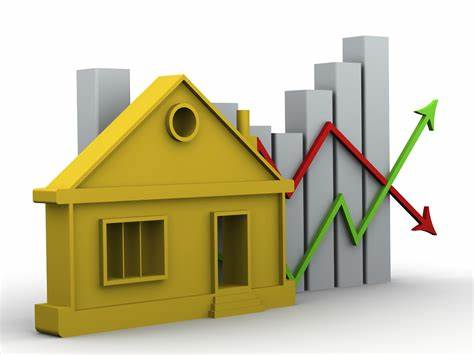

The dataset provided is related to house prices, with the goal of predicting the sale prices of homes based on various features. Here are the key aspects of the business understanding:

## Methodology

To achieve the project objectives, we will follow the Cross-Industry Standard Process for Data Mining (CRISP-DM) framework, a process used to guide the machine learning lifecycle. 

<img src="https://raw.githubusercontent.com/rasmodev/Income-Prediction-Challenge-For-Azubian/main/screenshots/CRISP-DM.png" width="600">

It is a six-phase process consisting of these key phases:

i. **Business Understanding**:
   - Understand the house price prediction problem and its significance and define its objective(s).

ii. **Data Understanding**:
   - Load the training and testing datasets.
   - Explore the datasets and variable descriptions.
   - Conduct detailed Exploratory Data Analysis (EDA) including univariate, bivariate, and multivariate analysis and performing hypothesis testing if applicable to validate assumptions.

iii. **Data Preparation**:
   - Clean the dataset by handling missing values, duplicates, outliers, and inconsistencies.
   - Encode categorical variables and perform feature engineering to prepare the data for machine learning modeling.
   - Select relevant variables and transform data as needed to prepare the dataset for modelings.

iv. **Modeling**:
    - Split the dataset into training and validation sets to facilitate model training and evaluation.
   - Select and implement suitable regression algorithms (e.g., Linear Regression, Random Forest Regression, Gradient Boosting Regression) for predicting house prices.
   - Train the models on the `train.csv` dataset.

v. **Evaluation**:
   - Assess the models' performance using metrics like RMSE and MAE.
   - Fine-tune the model hyperparameters using techniques like grid search or random search to optimize performance.
   - Use te best performing model to make test predictions using test.csv.

vi. **Deployment**:
   - Deploy the trained model as a web application for real-time prediction using frameworks like Streamlit, Gradio, or FastAPI.
---
By following the CRISP-DM framework, we aim to create a robust house price prediction model that leverages detailed EDA to inform data preparation and modeling stages, ensuring accurate and reliable predictions for stakeholders.

# 1. Business Understanding

### Objectives
The project has the following objectives:
#### **i. Exploratory Data Analysis (EDA):** 
- Gain insights into the housing data to understand features, demographics, and house prices. This understanding will help stakeholders make informed decisions.

#### **ii. Predictive Modeling:** 
- Build models to accurately estimate house sale prices, aiding property valuation for real estate companies, buyers, sellers, and financial institutions.

**Stakeholders:**

- **Real Estate Companies:** They can use the model to provide accurate property valuations to clients, ensuring competitive pricing.
- **Home Buyers and Sellers:** Individuals can benefit from understanding the fair market value of a property before buying or selling.
- **Financial Institutions:** Banks and mortgage lenders can use the model to assess the value of a property for lending purposes, reducing the risk of over or under-valuing a property.
- **Investors:** Property investors can make informed decisions on where to invest by understanding price trends and factors affecting property values.

# 2. Data Understanding

An in-depth exploration of the datasets is presented to gain insights into the available variables,their distributions and relationships. This step will provide an initial undertanding of the datasets to identify any data quality issues that will inform the cleaning and pre-processing steps.

## 2.1. Setup

### Installations

In [ ]:
# !pip install category_encoders
# !pip install lightgbm
!pip install --upgrade jinja2 nbconvert
!pip uninstall nbconvert
!pip install nbconvert

  Using cached mistune-3.0.2-py3-none-any.whl.metadata (1.7 kB)
   ---------------------------------------- 257.4/257.4 kB 1.1 MB/s eta 0:00:00
Using cached mistune-3.0.2-py3-none-any.whl (47 kB)
   ---------------------------------------- 78.5/78.5 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 85.4/85.4 kB 963.1 kB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.1.1
    Uninstalling traitlets-5.1.1:
      Successfully uninstalled traitlets-5.1.1
  Attempting uninstall: mistune
    Found existing installation: mistune 0.8.4
    Uninstalling mistune-0.8.4:
      Successfully uninstalled mistune-0.8.4
  Attempting uninstall: jupyter-core
    Found existing installation: jupyter_core 4.11.1
    Uninstalling jupyter_core-4.11.1:
      Successfully uninstalled jupyter_core-4.11.1
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.5.0
    Uninstalling nbformat-5.5.0:
      Successfully uninstalled nb

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.10.4 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importation of Relevant Libraries

In [265]:
# Data Handling
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Processing
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Machine Learning Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

# Model Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import pickle

# Other Packages
import warnings

warnings.filterwarnings("ignore")

## 2.2. Data Loading

### Data Fields
Here's a brief overview of the  Variable Definitions.

- **SalePrice**: The property's sale price in dollars. This is the target variable we're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **BedroomAbvGr**: Bedrooms above grade (does NOT include basement bedrooms)
- **KitchenAbvGr**: Kitchens above grade
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: Value of miscellaneous feature in dollars
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale

### Loading the Train and Test Datasets

#### Train Dataset

In [266]:
# Reading train dataset
train_df = pd.read_csv("data/train.csv")

# Overview of the test dataset
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Test Dataset

In [267]:
# Reading test dataset
test_df = pd.read_csv("data/test.csv")

# Overview of the test dataset
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


- The dataset includes various features related to the properties, such as physical attributes (e.g., lot area, number of bedrooms, garage size), location characteristics (e.g., neighborhood, zoning classification), and sale conditions.

- It consists of both numerical and categorical variables, and some columns have missing values that need to be handled appropriately.

- The 'SalePrice' column, containing numerical values, is the target variable that will be used in building the predictive models in this project, making this a regression problem.

- The dataset contains 81 features (train) and 80 features (test). The slight difference in column count between train and test data is because the test dataset lacks the target variable (SalesPrice) which is the prediction we have to make.

## 2.3. Exploratory Data Analysis (EDA):
### 2.3.1. Understanding the datasets
An in-depth exploration of the datasets is presented to gain insights into the available variables,their distributions and relationships. This step will provide an initial undertanding of the datasets to identify any data quality issues that will inform the cleaning and pre-processing.

#### i. Column Information of The Datasets

In [268]:
# Column information of the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- The train dataset columns include a mix of numerical and categorical features, describing various property characteristics, such as physical attributes (e.g., lot area, number of bedrooms, garage size), location characteristics (e.g., neighborhood, zoning classification), and sale conditions.


- Several columns have missing values. Some examples include "LotFrontage" and "Alley".

In [269]:
# Column information of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

The test dataset contains missing values in several columns.

#### ii. Shape of The Datasets

In [270]:
# The shape of the train dataset
train_df.shape

(1460, 81)

The train dataset contains 1460 rows and 81 columns.

In [271]:
# The shape of the test dataset
test_df.shape

(1459, 80)

The test dataset has 1459 rows and 80 columns, and equally 

#### iii. Summary Statistics of Numerical Variables in the Datasets

In [272]:
# Summary Statistics of The Train Dataset
train_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500,421.610,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897,42.301,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.050,24.285,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828,9981.265,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099,1.383,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575,1.113,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.268,30.203,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.866,20.645,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685,181.066,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.640,456.098,0.0,0.00,383.5,712.25,5644.0


In [273]:
# Summary Statistics of The Train Dataset
test_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000,421.321,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378,42.747,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580,22.377,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161,4955.517,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.079,1.437,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.554,1.114,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.358,30.390,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.663,21.130,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709,177.626,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.204,455.268,0.0,0.00,350.5,753.50,4010.0


#### iv.  Checking For Duplicate Values in The Datasets

In [274]:
# Check for duplicates in the dataset
train_df_duplicates = train_df[train_df.duplicated()]

# Display the duplicate rows in the dataset, if any
if not train_df_duplicates.empty:
    print("Duplicate Rows in Dataset:")
    display(train_df_duplicates)  # Display the duplicated dataframe
else:
    print("No Duplicate Rows in Dataset")

No Duplicate Rows in Dataset


#### v. Checking The Unique Values in The Datasets

We proceed to examining unique values in the dataset to identify any inconsistencies, unusual characters or symbols (e.g., "NA" vs. "?") representing missing data to help ensure data quality before further analysis.

In [275]:
# Define The datasets
datasets = {'train': train_df, 'test': test_df}

# Define a function to print unique values for columns in the datasets
def print_unique_categorical(datasets):
  
  # Check if column is categorical (object dtype)  
  for col in datasets.select_dtypes(include='object'):
    underline = '-' * len(f"Column: {col}")
    print(f"Column: {col}")
    print(underline)
    
    # Print unique values
    unique_values = datasets[col].unique()
    print(f"Unique Values: {unique_values}")
    print()

In [276]:
# Print unique values for categorical columns in the 'train dataset'
print("Unique values in categorical columns (train dataset):")
print("=" * 53) 
print_unique_categorical(train_df)

Unique values in categorical columns (train dataset):
Column: MSZoning
----------------
Unique Values: ['RL' 'RM' 'C (all)' 'FV' 'RH']

Column: Street
--------------
Unique Values: ['Pave' 'Grvl']

Column: Alley
-------------
Unique Values: [nan 'Grvl' 'Pave']

Column: LotShape
----------------
Unique Values: ['Reg' 'IR1' 'IR2' 'IR3']

Column: LandContour
-------------------
Unique Values: ['Lvl' 'Bnk' 'Low' 'HLS']

Column: Utilities
-----------------
Unique Values: ['AllPub' 'NoSeWa']

Column: LotConfig
-----------------
Unique Values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Column: LandSlope
-----------------
Unique Values: ['Gtl' 'Mod' 'Sev']

Column: Neighborhood
--------------------
Unique Values: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Column: Condition1
------------------


In [277]:
# Print unique values for categorical columns in the 'test' dataset
print("Unique values in the 'test' dataset:")
print("==="*13)
print_unique_categorical(test_df)

Unique values in the 'test' dataset:
Column: MSZoning
----------------
Unique Values: ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]

Column: Street
--------------
Unique Values: ['Pave' 'Grvl']

Column: Alley
-------------
Unique Values: [nan 'Pave' 'Grvl']

Column: LotShape
----------------
Unique Values: ['Reg' 'IR1' 'IR2' 'IR3']

Column: LandContour
-------------------
Unique Values: ['Lvl' 'HLS' 'Bnk' 'Low']

Column: Utilities
-----------------
Unique Values: ['AllPub' nan]

Column: LotConfig
-----------------
Unique Values: ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']

Column: LandSlope
-----------------
Unique Values: ['Gtl' 'Mod' 'Sev']

Column: Neighborhood
--------------------
Unique Values: ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']

Column: Condition1
------------------
Unique Values: ['F

- There seems to be no inconsistencies, unusual characters, symbols or leading blank spaces in the unique values in the datasets. 
- However, there are instances of "None" in the 'MasVnrType' which also contains nan values that represents missing values. Further exploration will be done to identify whether the values labelled as "None" also represent missing values.

#### vi. Checking for Missing Values in The Datasets

Missing values in the Train dataset:
************************************
      Column  Missing Values  Missing Values Percentage (%)
      PoolQC            1453                          99.52
 MiscFeature            1406                          96.30
       Alley            1369                          93.77
       Fence            1179                          80.75
 FireplaceQu             690                          47.26
 LotFrontage             259                          17.74
  GarageType              81                           5.55
 GarageYrBlt              81                           5.55
GarageFinish              81                           5.55
  GarageQual              81                           5.55
  GarageCond              81                           5.55
BsmtExposure              38                           2.60
BsmtFinType2              38                           2.60
BsmtFinType1              37                           2.53
    BsmtCond              

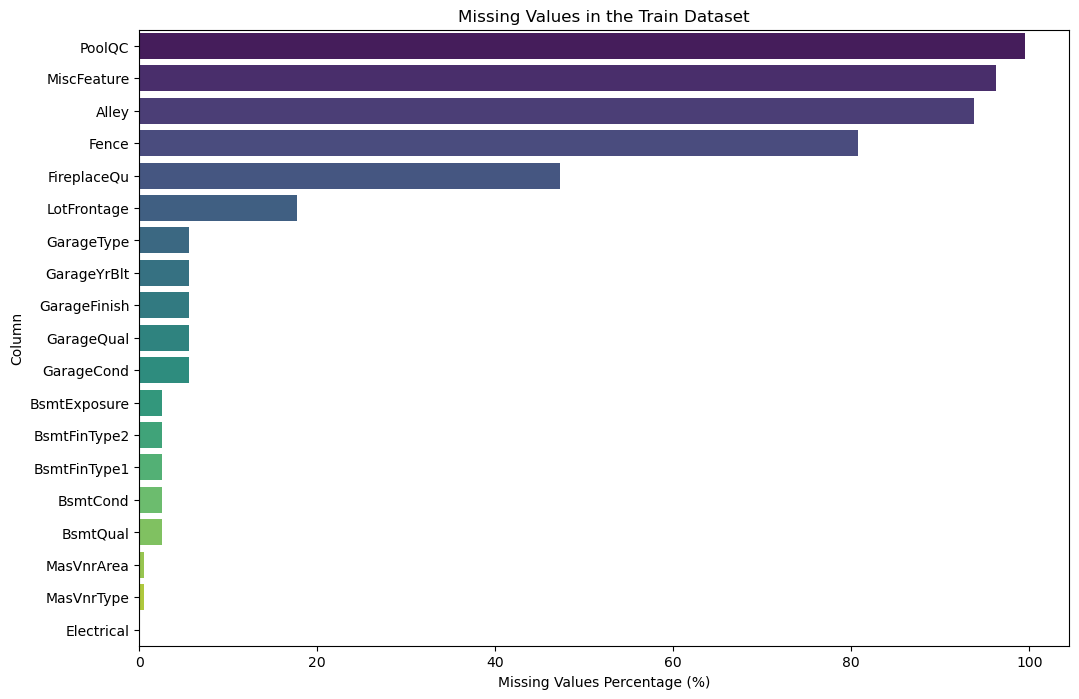

Missing values in the Test dataset:
***********************************
      Column  Missing Values  Missing Values Percentage (%)
      PoolQC            1456                          99.79
 MiscFeature            1408                          96.50
       Alley            1352                          92.67
       Fence            1169                          80.12
 FireplaceQu             730                          50.03
 LotFrontage             227                          15.56
  GarageCond              78                           5.35
 GarageYrBlt              78                           5.35
  GarageQual              78                           5.35
GarageFinish              78                           5.35
  GarageType              76                           5.21
    BsmtCond              45                           3.08
BsmtExposure              44                           3.02
    BsmtQual              44                           3.02
BsmtFinType1              42

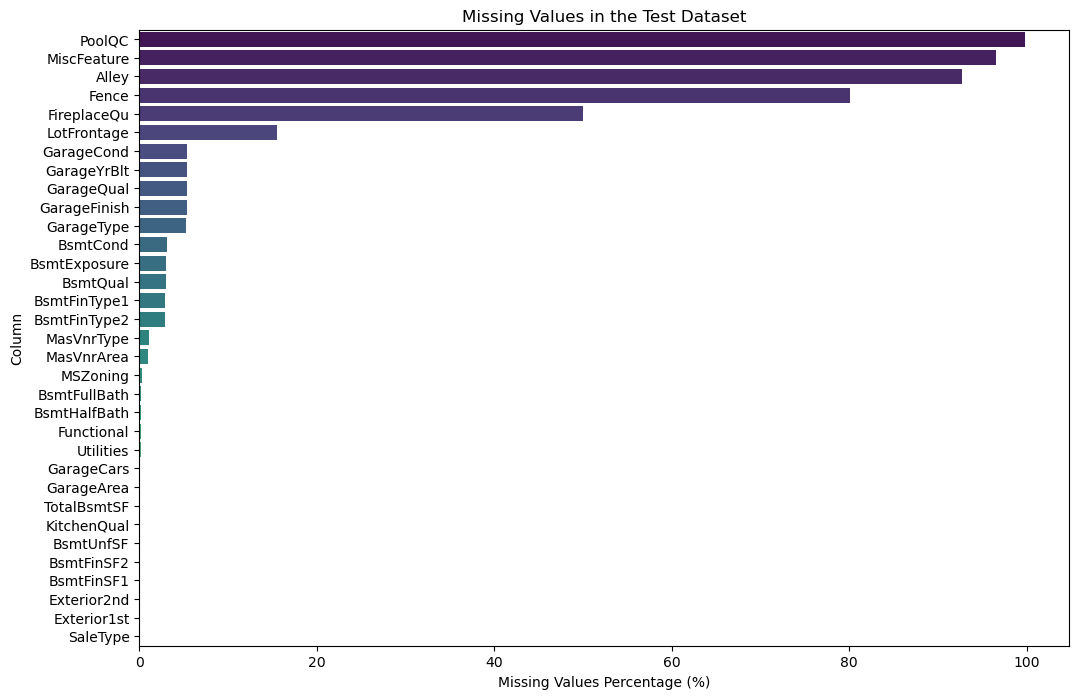

In [278]:
# Define a function to print the missing values in the datasets
def show_missing_values(datasets):
    for name, data in datasets.items():
        title = f"Missing values in the {name.capitalize()} dataset:"

        # Create an underline of asterisks
        underline = '*' * len(title)
        print(title)
        print(underline)

        # Calculate the sum of missing values for each column
        missing_values = data.isnull().sum()

        # Exclude columns with 0 as missing values
        missing_values = missing_values[missing_values > 0]

        # Check if there are any columns with missing values
        if not missing_values.empty:

            # Calculate the percentage of missing values
            missing_percentages = ((missing_values / len(data)) * 100).round(2)

            # Create a DataFrame with columns sorted by missing values percentage (highest to lowest)
            missing_info = pd.DataFrame({
                'Column': missing_values.index,
                'Missing Values': missing_values,
                'Missing Values Percentage (%)': missing_percentages
            })

            # Sort the DataFrame by missing values percentage in descending order
            missing_info = missing_info.sort_values(by='Missing Values Percentage (%)', ascending=False)

            # Use to_string to remove index column
            print(missing_info.to_string(index=False))
            print('===' * 26)
        else:
            # If no missing values found, indicate that
            print("No missing values found.")
        print()
        # Set the plot size
        plt.figure(figsize=(12, 8))

        # Create a horizontal bar graph with the Viridis palette
        ax = sns.barplot(x="Missing Values Percentage (%)", y="Column", data=missing_info, palette="viridis")

        # Set the axis labels and title
        ax.set(xlabel="Missing Values Percentage (%)", ylabel="Column", title=f"Missing Values in the {name.capitalize()} Dataset")

        # Display the plot
        plt.show()

# Call the function to show missing values in the datasets
show_missing_values(datasets)

- Some columns such as "PoolQC", "MiscFeature", "Alley", and "Fence" have more than 80% of missing values. These columns need to be dropped.

- Equally, we will also drop the features or rows with very few missing value percentages. 

- The rest of the missing values below 80% will be handled using the relevant imputation strategy.

#### vii. Handling Missing Values

In this section, we address missing values in the dataset. Proper handling of missing data is crucial for robust analysis and ensures data consistency. We start by dropping columns containing over 80% in missing values.

##### a. Dropping Columns With Over 80% Missing Values 

In [279]:
# Define a threshold percentage of 80% for dropping missing values
threshold = 0.80

# Create copies of the dataframes to avoid modifying original data
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

# Create an empty list to store columns that exceed the threshold
train_columns_to_drop = []
test_columns_to_drop = []


# Iterate through each column in the train dataset
for col in train_df.columns:

    # Calculate the percentage of missing values for the current column
    missing_percentage = train_df[col].isnull().sum() / len(train_df)

    # Check if the missing percentage is greater than the defined threshold
    if missing_percentage > threshold:

        # If it exceeds the threshold, add the column name to the list
        train_columns_to_drop.append(col)


# Iterate through each column in the test dataset
for col in test_df.columns:

    # Calculate the percentage of missing values for the current column
    missing_percentage = test_df[col].isnull().sum() / len(test_df)

    # Check if the missing percentage is greater than the defined threshold
    if missing_percentage > threshold:

        # If it exceeds the threshold, add the column name to the list
        test_columns_to_drop.append(col)

# Drop the identified columns with high missing values from both the train and test datasets
train_df_copy.drop(columns=train_columns_to_drop, inplace=True)
test_df_copy.drop(columns=test_columns_to_drop, inplace=True)

print(f"Dropped columns in train dataset: {train_columns_to_drop}")
print()
print(f"Dropped columns in test dataset: {test_columns_to_drop}")

Dropped columns in train dataset: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

Dropped columns in test dataset: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


Missing values in the Train dataset:
************************************
      Column  Missing Values  Missing Values Percentage (%)
 FireplaceQu             690                          47.26
 LotFrontage             259                          17.74
  GarageType              81                           5.55
 GarageYrBlt              81                           5.55
GarageFinish              81                           5.55
  GarageQual              81                           5.55
  GarageCond              81                           5.55
BsmtExposure              38                           2.60
BsmtFinType2              38                           2.60
    BsmtQual              37                           2.53
    BsmtCond              37                           2.53
BsmtFinType1              37                           2.53
  MasVnrType               8                           0.55
  MasVnrArea               8                           0.55
  Electrical              

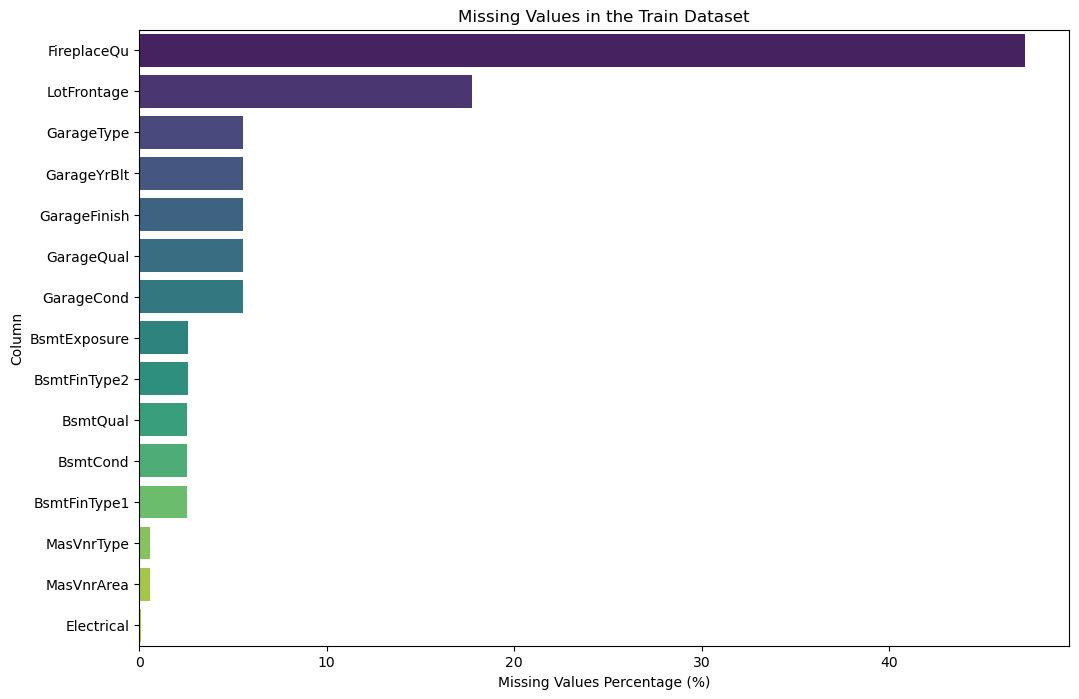

Missing values in the Test dataset:
***********************************
      Column  Missing Values  Missing Values Percentage (%)
 FireplaceQu             730                          50.03
 LotFrontage             227                          15.56
 GarageYrBlt              78                           5.35
  GarageCond              78                           5.35
  GarageQual              78                           5.35
GarageFinish              78                           5.35
  GarageType              76                           5.21
    BsmtCond              45                           3.08
    BsmtQual              44                           3.02
BsmtExposure              44                           3.02
BsmtFinType2              42                           2.88
BsmtFinType1              42                           2.88
  MasVnrType              16                           1.10
  MasVnrArea              15                           1.03
    MSZoning               4

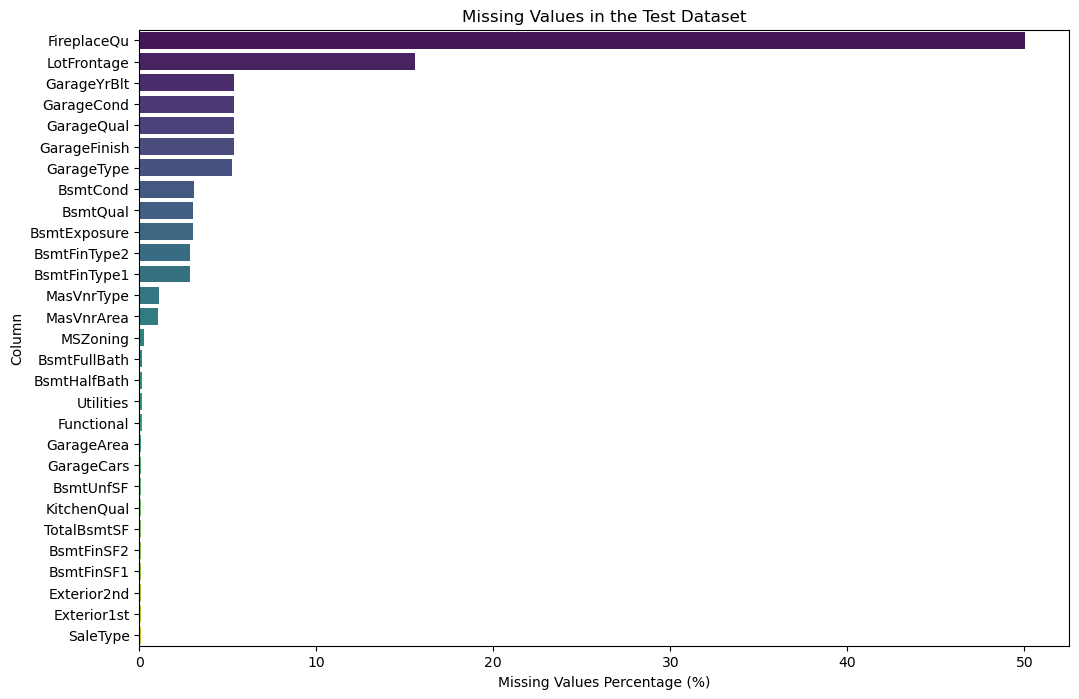

In [280]:
# Check the remaining missing values
show_missing_values({'train': train_df_copy, 'test': test_df_copy})

##### b. Dropping Rows With Less Than 2% of Missing Values in Their Respective Columns

In [281]:
# Calculate the percentage of missing values for each column in the copied dataframes
missing_values_train = train_df_copy.isnull().mean() * 100
missing_values_test = test_df_copy.isnull().mean() * 100

# Identify columns with less than 2% missing values
columns_with_less_than_2_percent_missing_train = missing_values_train[missing_values_train < 2].index
columns_with_less_than_2_percent_missing_test = missing_values_test[missing_values_test < 2].index

# Drop rows with missing values in the identified columns
train_df_copy.dropna(subset=columns_with_less_than_2_percent_missing_train, inplace=True)
test_df_copy.dropna(subset=columns_with_less_than_2_percent_missing_test, inplace=True)

Missing values in the Train dataset:
************************************
      Column  Missing Values  Missing Values Percentage (%)
 FireplaceQu             685                          47.21
 LotFrontage             257                          17.71
  GarageType              81                           5.58
 GarageYrBlt              81                           5.58
GarageFinish              81                           5.58
  GarageQual              81                           5.58
  GarageCond              81                           5.58
BsmtExposure              38                           2.62
BsmtFinType2              38                           2.62
    BsmtQual              37                           2.55
    BsmtCond              37                           2.55
BsmtFinType1              37                           2.55



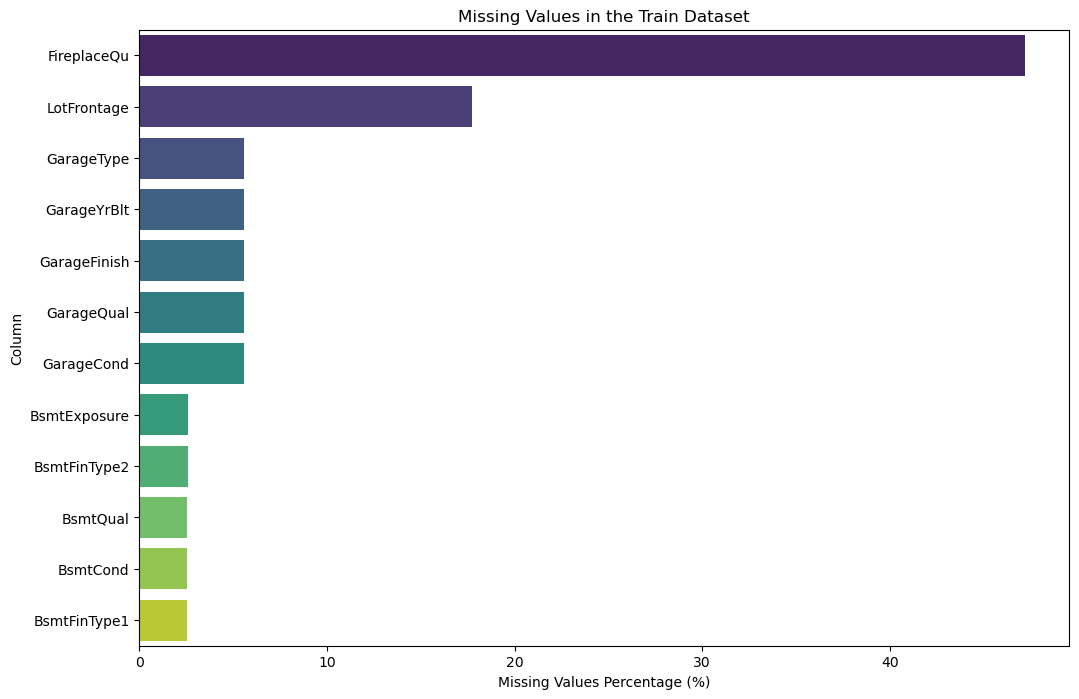

Missing values in the Test dataset:
***********************************
      Column  Missing Values  Missing Values Percentage (%)
 FireplaceQu             716                          50.03
 LotFrontage             221                          15.44
 GarageYrBlt              75                           5.24
GarageFinish              75                           5.24
  GarageQual              75                           5.24
  GarageCond              75                           5.24
  GarageType              74                           5.17
    BsmtCond              40                           2.80
    BsmtQual              39                           2.73
BsmtExposure              39                           2.73
BsmtFinType1              37                           2.59
BsmtFinType2              37                           2.59



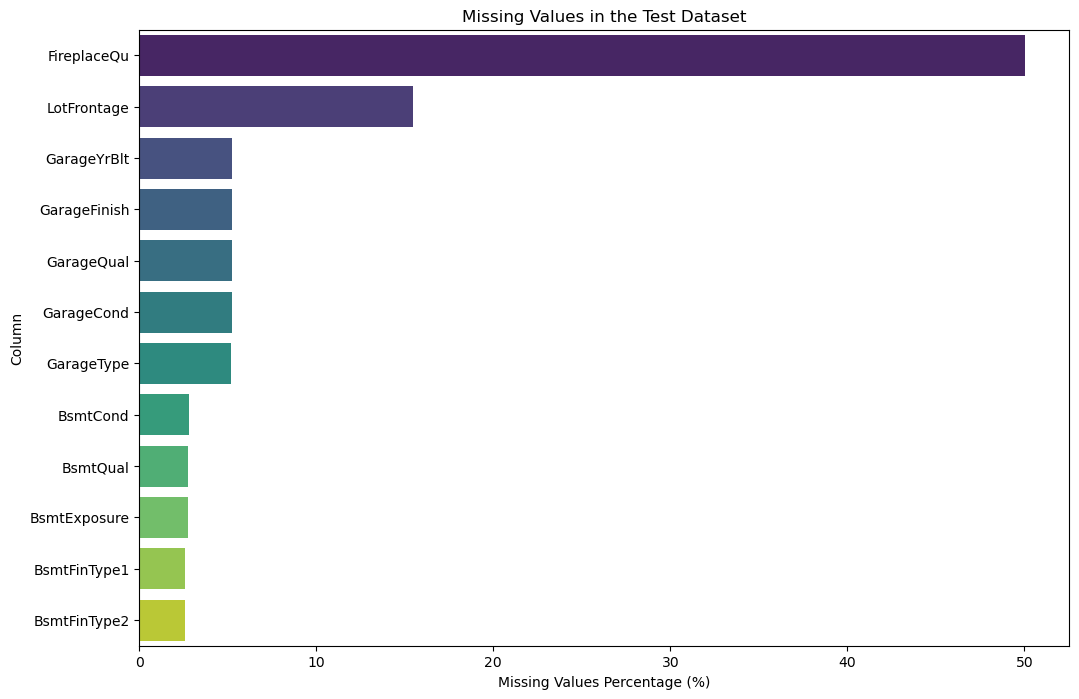

In [282]:
# Check the remaining missing values
show_missing_values({'train': train_df_copy, 'test': test_df_copy})

##### c. Handle The Missing Values With The Relevant Imputation Strategies

In [283]:
# Print data types for columns with missing values *after dropping* (Train data)
print("\nData Types for Columns with Missing Values (Train):")
print('===' * 17)
for col in train_df_copy.columns:
  # Check for missing values in the *dropped* DataFrame
  if train_df_copy[col].isnull().sum() > 0:
    print(f"{col}: {train_df_copy[col].dtype}")


Data Types for Columns with Missing Values (Train):
LotFrontage: float64
BsmtQual: object
BsmtCond: object
BsmtExposure: object
BsmtFinType1: object
BsmtFinType2: object
FireplaceQu: object
GarageType: object
GarageYrBlt: float64
GarageFinish: object
GarageQual: object
GarageCond: object


**Categorical Columns Imputation Strategies:**

Most of the missing values are in categorical columns. These will be imputed using mode imputation, by replacing them with the most frequent value in the column. 

---
**Numerical Columns Imputation Strategies:**
- **LotFrontage:**
This variable represents the linear feet of street connected to the property. It essentially measures the length of the property boundary that is adjacent to the street.

**Imputation Strategy:** Since this variable may have a skewed distribution, with more common values on the lower end (narrower lots) and a few outliers with very large frontages. Therefore, it can be imputed using the median to minimize the effect of these outliers.


- **GarageYrBlt:**
The variable indicates the year the garage was built. It is a measure of the age of the garage, which can be an important factor in property valuation.

**Imputation Strategy:** Impute using the most frequent value (mode), as certain years might be more frequent.

In [284]:
# Handle the missing values using the specified imputation strategies
# Define the columns to be imputed
numerical_columns = ['LotFrontage', 'GarageYrBlt']
categorical_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# Impute LotFrontage with the median
numerical_imputer = SimpleImputer(strategy='median')
train_df_copy['LotFrontage'] = numerical_imputer.fit_transform(train_df_copy[['LotFrontage']])
test_df_copy['LotFrontage'] = numerical_imputer.transform(test_df_copy[['LotFrontage']])

# Impute GarageYrBlt with the most frequent value (mode)
garage_yr_imputer = SimpleImputer(strategy='most_frequent')
train_df_copy['GarageYrBlt'] = garage_yr_imputer.fit_transform(train_df_copy[['GarageYrBlt']])
test_df_copy['GarageYrBlt'] = garage_yr_imputer.transform(test_df_copy[['GarageYrBlt']])

# Impute categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_df_copy[categorical_columns] = categorical_imputer.fit_transform(train_df_copy[categorical_columns])
test_df_copy[categorical_columns] = categorical_imputer.transform(test_df_copy[categorical_columns])

In [285]:
# Confirm If Missing Values Have Been Dropped
# Define a function to check if the datasets have any missing values
def show_missing_values(datasets):
    for dataset_name, dataset in datasets.items():
        missing_info = dataset.isnull().sum().reset_index()
        missing_info.columns = ['Column', 'Missing Values']
        missing_info['Missing Values Percentage (%)'] = (missing_info['Missing Values'] / len(dataset)) * 100
        missing_info = missing_info[missing_info['Missing Values'] > 0]
        
        if not missing_info.empty:
            print(f"Missing values in the {dataset_name.capitalize()} dataset:")
            print("************************************")
            print(missing_info)
            print("="*46)
            
        else:
            print(f"No missing values found in the {dataset_name.capitalize()} dataset.")
            print("="*46)

# Check the remaining missing values
show_missing_values({'train': train_df_copy, 'test': test_df_copy})

No missing values found in the Train dataset.
No missing values found in the Test dataset.


We have successfully handled all the missing values in the train and test datasets.

In [286]:
# Create copies of the dataframes to avoid modifying original data
train_df_imputed = train_df_copy.copy()
test_df_imputed = test_df_copy.copy()

In [287]:
# Overview of the imputed train dataframe
train_df_imputed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [288]:
# Overview of the imputed test dataframe
test_df_imputed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


- It is common to have 0 values in certain columns, particularly those that represent counts or areas where the value might logically be zero (e.g., PoolArea, EnclosedPorch, ScreenPorch, MiscVal, etc.). 

- These zeros are valid data points and do not indicate missing values. For instance, columns like PoolArea, EnclosedPorch, ScreenPorch, etc., can have zero values because not all properties have a pool, an enclosed porch, or a screen porch. 

- A zero in these columns simply means the feature is not present for that particular property.

#### viii. Feature Selection

While we've removed columns with a high percentage of missing values (over 80%), we still have many columns. Conducting an EDA on such a large number of columns can be challenging. To address this and potentially reduce the number of features for our EDA, we'll employ a two-step approach:

- **Identify Most Relevant Features:**

**Hypothesis Testing:** To identify categorical features that statistically influence the target variable, we'll use appropriate tests like chi-square.

**Correlation Analysis:** This measures the strength and direction of the linear relationship between features and the target variable. We'll calculate the absolute correlation values .

- **Prioritize Features with Strong Associations:**

We'll set a threshold for the absolute correlation values. Features with correlations exceeding the threshold will be considered more relevant to the target variable and prioritized. This reduces the number of features, making the process more manageable.
By focusing on the most relevant features, we can achieve a good balance between data quality and computational efficiency during subsequent processes.

In [289]:
# Drop the ID column since it's not relevant in predicting the sales price
train_df_imputed.drop(columns=['Id'], inplace=True)
test_df_imputed.drop(columns=['Id'], inplace=True)

In [290]:
# Group the variables by their data types
categorical_columns = train_df_imputed.select_dtypes(include=['object']).columns.tolist()
numerical_columns = train_df_imputed.select_dtypes(include=['number']).columns.tolist()

# Print the grouped variables
print("Categorical Columns:")
print("="*123)
print(categorical_columns)

print("\nNumerical Columns:")
print("="*123)
print(numerical_columns)

Categorical Columns:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Numerical Columns:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclosed

#### a. Correlation Analysis of The Categorical Variables with the Target Variable

Since we only have one categorical column, we will use a hypothesis test to identify whether there is a significant relationshp between 'galaxy' and the 'Well-being Index'. 

---
We start by defining our hypothesis:

- **Null hypothesis (H0)**: There is no significant association between the categorical features and 'SalePrice'.

- **Alternative hypothesis (H1)**: There is a significant association between the categorical features and 'SalePrice'.

In [291]:
from scipy.stats import chi2_contingency
import pandas as pd

# Function to conduct chi-square test for each categorical column and interpret the results
def chi_square_test_and_interpret(df, target_variable, categorical_columns, alpha=0.05):
    results = []
    
    for column in categorical_columns:
        # Create a contingency table
        contingency_table = pd.crosstab(df[column], df[target_variable])
        
        # Perform chi-square test
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        
        # Determine if the null hypothesis is accepted or rejected
        if p < alpha:
            result = "Reject Null Hypothesis"
        else:
            result = "Accept Null Hypothesis"
        
        # Store the results
        results.append({
            'Feature': column,
            'Chi2': chi2,
            'p-value': f"{p:.4f}",
            '° of Freedom': dof,
            'Result': result,
        })
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df


# Conduct chi-square test for each categorical column
target_variable = 'SalePrice'
chi_square_results = chi_square_test_and_interpret(train_df_imputed, target_variable, categorical_columns)

# Display the results
chi_square_results

,Feature,Chi2,p-value,° of Freedom,Result
0,MSZoning,3114.631851,0.0000,2624,Reject Null Hypothesis
1,Street,882.822550,0.0000,656,Reject Null Hypothesis
2,LotShape,2430.464413,0.0000,1968,Reject Null Hypothesis
3,LandContour,2059.018729,0.0750,1968,Accept Null Hypothesis
4,Utilities,240.999425,1.0000,656,Accept Null Hypothesis
5,LotConfig,2756.938460,0.0348,2624,Reject Null Hypothesis
6,LandSlope,1380.031663,0.0936,1312,Accept Null Hypothesis
7,Neighborhood,16767.455679,0.0000,15744,Reject Null Hypothesis
8,Condition1,4134.275753,1.0000,5248,Accept Null Hypothesis
9,Condition2,4783.610352,0.0239,4592,Reject Null Hypothesis


In [292]:
# Convert 'p-value' column to float
chi_square_results['p-value'] = chi_square_results['p-value'].astype(float)

# Group columns by result (Reject Null Hypothesis or Accept Null Hypothesis)
rejected_null_hypothesis = chi_square_results[chi_square_results['Result'] == 'Reject Null Hypothesis'][['Feature', 'p-value']].sort_values(by='p-value', ascending=False)
accepted_null_hypothesis = chi_square_results[chi_square_results['Result'] == 'Accept Null Hypothesis'][['Feature', 'p-value']].sort_values(by='p-value', ascending=False)

# Print accepted null hypothesis columns
print("Accepted Null Hypothesis Variables:")
print("="*35)
print(accepted_null_hypothesis)
print()

# Print rejected null hypothesis columns
print("Rejected Null Hypothesis Variables:")
print("="*35)
print(rejected_null_hypothesis)

Accepted Null Hypothesis Variables:
         Feature  p-value
24  BsmtFinType2   1.0000
35    GarageCond   1.0000
8     Condition1   1.0000
10      BldgType   1.0000
30    Functional   1.0000
12     RoofStyle   1.0000
13      RoofMatl   1.0000
14   Exterior1st   1.0000
4      Utilities   1.0000
26     HeatingQC   0.9993
15   Exterior2nd   0.9921
36    PavedDrive   0.9894
23  BsmtFinType1   0.9656
11    HouseStyle   0.6033
32    GarageType   0.3471
34    GarageQual   0.2225
6      LandSlope   0.0936
3    LandContour   0.0750

Rejected Null Hypothesis Variables:
          Feature  p-value
28     Electrical   0.0434
5       LotConfig   0.0348
9      Condition2   0.0239
31    FireplaceQu   0.0002
0        MSZoning   0.0000
22   BsmtExposure   0.0000
37       SaleType   0.0000
33   GarageFinish   0.0000
29    KitchenQual   0.0000
27     CentralAir   0.0000
25        Heating   0.0000
20       BsmtQual   0.0000
21       BsmtCond   0.0000
1          Street   0.0000
19     Foundation   0.0000
1

In [293]:
# Get the list of columns to drop
columns_to_drop = rejected_null_hypothesis['Feature'].tolist()

# Drop the columns from the train_df_copy DataFrame
train_df_imputed.drop(columns=columns_to_drop, axis=1, inplace=True)
test_df_imputed.drop(columns=columns_to_drop, axis=1, inplace=True)

# Verify the columns have been dropped
print("Columns dropped from the datasets:")
print("="*35)
print(columns_to_drop)
print()

Columns dropped from the datasets:
['Electrical', 'LotConfig', 'Condition2', 'FireplaceQu', 'MSZoning', 'BsmtExposure', 'SaleType', 'GarageFinish', 'KitchenQual', 'CentralAir', 'Heating', 'BsmtQual', 'BsmtCond', 'Street', 'Foundation', 'ExterCond', 'ExterQual', 'MasVnrType', 'Neighborhood', 'LotShape', 'SaleCondition']



#### b. Correlation Analysis of The Numerical Variables with the Target Variable

In [294]:
# Calculating the correlation matrix
correlation_matrix = train_df_imputed[numerical_columns].corr()
correlation_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.355068,-0.138039,0.034799,-0.061147,0.027979,0.040664,0.023156,-0.069241,-0.066037,...,-0.012652,-0.005200,-0.010437,-0.044009,-0.026316,0.008240,-0.007773,-0.013659,-0.021583,-0.082760
LotFrontage,-0.355068,1.000000,0.304694,0.233277,-0.053026,0.116365,0.082885,0.179537,0.215778,0.042811,...,0.074495,0.134766,0.010728,0.062188,0.037974,0.181300,-0.000184,0.009784,0.007310,0.333206
LotArea,-0.138039,0.304694,1.000000,0.106305,-0.002297,0.015708,0.015190,0.104141,0.213081,0.111674,...,0.173170,0.086278,-0.023114,0.020568,0.043498,0.077885,0.038221,0.003177,-0.012969,0.264668
OverallQual,0.034799,0.233277,0.106305,1.000000,-0.090940,0.572129,0.550499,0.411699,0.236421,-0.058211,...,0.240728,0.303215,-0.113176,0.030972,0.066271,0.065720,-0.031183,0.068514,-0.025116,0.790085
OverallCond,-0.061147,-0.053026,-0.002297,-0.090940,1.000000,-0.376557,0.075545,-0.128333,-0.042292,0.039234,...,-0.004514,-0.031432,0.074612,0.025123,0.053925,-0.002254,0.068617,-0.004210,0.043487,-0.076361
YearBuilt,0.027979,0.116365,0.015708,0.572129,-0.376557,1.000000,0.590324,0.316345,0.250209,-0.047609,...,0.226960,0.185758,-0.386748,0.032145,-0.048977,0.005368,-0.033994,0.009756,-0.014559,0.523274
YearRemodAdd,0.040664,0.082885,0.015190,0.550499,0.075545,0.590324,1.000000,0.180136,0.128422,-0.066485,...,0.207514,0.224140,-0.192185,0.046012,-0.037471,0.006198,-0.009866,0.018959,0.035263,0.507488
MasVnrArea,0.023156,0.179537,0.104141,0.411699,-0.128333,0.316345,0.180136,1.000000,0.264469,-0.072443,...,0.159754,0.125461,-0.110363,0.018752,0.061367,0.011697,-0.029854,-0.006159,-0.008147,0.477486
BsmtFinSF1,-0.069241,0.215778,0.213081,0.236421,-0.042292,0.250209,0.128422,0.264469,1.000000,-0.049498,...,0.205447,0.107279,-0.105887,0.026926,0.063139,0.141361,0.003852,-0.016387,0.016969,0.383995
BsmtFinSF2,-0.066037,0.042811,0.111674,-0.058211,0.039234,-0.047609,-0.066485,-0.072443,-0.049498,1.000000,...,0.067684,0.004155,0.036680,-0.030211,0.088430,0.041597,0.004784,-0.014977,0.031880,-0.010350


Due to the high number of numerical variables we do not plot the correlation matrix plot since it will be too clustered.

In [295]:
# Extracting the correlation of each variable with the SalePrice
correlation_with_saleprice = correlation_matrix['SalePrice']

# Creating a DataFrame with variables and their correlation with SalePrice
correlation_df = pd.DataFrame(correlation_with_saleprice)
correlation_df.columns = ['Correlation with SalePrice']

# Sorting the DataFrame by correlation values from highest to lowest
sorted_correlation_df = correlation_df.sort_values(by='Correlation with SalePrice', ascending=False)

# Adding index and variable heading
sorted_correlation_df.index.name = 'Variable'
sorted_correlation_df.reset_index(inplace=True)

# Print the sorted correlation DataFrame
sorted_correlation_df

,Variable,Correlation with SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790085
2,GrLivArea,0.710073
3,GarageCars,0.639749
4,GarageArea,0.622484
5,TotalBsmtSF,0.613299
6,1stFlrSF,0.606969
7,FullBath,0.562710
8,TotRmsAbvGrd,0.536366
9,YearBuilt,0.523274


The correlation matrix provides a comprehensive overview of the relationships between different variables and the well-being index.

**Positive Correlation**: 
- Variables such as "Overall Quality (OverallQual)", "Above Ground Living Area (GrLivArea)", "Garage Cars Capacity (GarageCars)," and "GarageArea" exhibit a strong positive correlation with the SalePrice.
- As these variables increase, the sale price tends to increase as well.

**Negative Correlation**: 

- Conversely, variables like "Overall Condition (OverallCond)", "MSSubClass", "EnclosedPorch", and "Kitchen Above Grade (KitchenAbvGr)" show a negative correlation with the SalePrice.
- An increase in these variables correlates with a decrease in sale price.

**Magnitude of Correlation**: 

- The strength of correlation varies across different variables, indicating varying degrees of influence on the sale price.

---
Understanding both the direction and strength of correlation helps prioritize variables for further analysis and intervention to predict sale prices accurately.

We will use the absolute correlation values to select the most relevant features, focusing on the magnitude of the correlation coefficients rather than their direction (positive or negative). Variables with higher absolute correlation values will be prioritized for further analysis, as they have a more significant impact on sale price prediction.

By considering the correlation analysis results, we can identify key determinants of sale prices.

#### c. Calculating the Absolute Correlation Values of the Variables with Respect to the Target Variable

- Absolute correlation measures the strength of the linear relationship between two variables, irrespective of the direction of the relationship (positive or negative).
- In correlation analysis, coefficients range from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.
- Absolute correlation focuses solely on the magnitude of the correlation coefficient, disregarding its sign (positive or negative).
- This approach is valuable for identifying variables strongly associated with each other, regardless of whether the relationship is positive or negative.

In [296]:
# Sorting the correlation DataFrame by absolute correlation values and rounding off to 2 decimal places
sorted_correlation_df2 = correlation_df.iloc[:-1].abs().sort_values(by='Correlation with SalePrice', ascending=False).round(2)

# Add a new column 'Variable' with variable names
sorted_correlation_df2['Variable'] = sorted_correlation_df2.index

# Reset the index to make 'Variable' a regular column
sorted_correlation_df2.reset_index(drop=True, inplace=True)

# Reorder the columns to have 'Variable' as the first column
sorted_correlation_df2 = sorted_correlation_df2[['Variable', 'Correlation with SalePrice']]

# Print the updated DataFrame
sorted_correlation_df2

,Variable,Correlation with SalePrice
0,OverallQual,0.79
1,GrLivArea,0.71
2,GarageCars,0.64
3,GarageArea,0.62
4,TotalBsmtSF,0.61
5,1stFlrSF,0.61
6,FullBath,0.56
7,TotRmsAbvGrd,0.54
8,YearBuilt,0.52
9,YearRemodAdd,0.51


This above dataframe presents the absolute correlation values of the variables with respect to the SalePrice in descending order.

---
To select the most relevant features, we set a threshold value of 0.5 to filter out correlations below this threshold, allowing us to prioritize variables with stronger associations with the target variable (SalePrice).

- By excluding correlations below 0.5, we concentrate on variables that have a more significant impact on the variance of the SalePrice, enhancing the relevance of our analysis.

- This approach simplifies the selection process, ensuring that we concentrate on the most meaningful predictors for understanding and predicting the SalePrice of houses.

In [297]:
# Selecting the top features with the highest correlation with the well-being index
threshold = 0.5
top_features = sorted_correlation_df2[sorted_correlation_df2['Correlation with SalePrice'] > threshold]

# Reset the index to make 'Variable' a regular column and rename the index column
top_features.reset_index(inplace=True)

# Keep only the desired columns
top_features = top_features[['Variable', 'Correlation with SalePrice']]  

# Print the updated DataFrame
top_features

,Variable,Correlation with SalePrice
0,OverallQual,0.79
1,GrLivArea,0.71
2,GarageCars,0.64
3,GarageArea,0.62
4,TotalBsmtSF,0.61
5,1stFlrSF,0.61
6,FullBath,0.56
7,TotRmsAbvGrd,0.54
8,YearBuilt,0.52
9,YearRemodAdd,0.51


These are the most relevant numerical features for our analysis.

In [298]:
# Print the columns to drop from train_df_imputed dataframe
columns_to_drop = [col for col in train_df_imputed.columns if col not in top_features['Variable'].tolist()]

print("Columns to drop from train_df_imputed:")
print(columns_to_drop)

Columns to drop from train_df_imputed:
['MSSubClass', 'LotFrontage', 'LotArea', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


#### d. Saving the Selected Features as an Updated Train Dataset

We will now save the selected numerical features as a new training dataset called `train_selected_df`.

In [299]:
train_df_imputed.head()

,MSSubClass,LotFrontage,LotArea,LandContour,Utilities,LandSlope,Condition1,BldgType,HouseStyle,OverallQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,Lvl,AllPub,Gtl,Norm,1Fam,2Story,7,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,Lvl,AllPub,Gtl,Feedr,1Fam,1Story,6,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,Lvl,AllPub,Gtl,Norm,1Fam,2Story,7,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,Lvl,AllPub,Gtl,Norm,1Fam,2Story,7,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,Lvl,AllPub,Gtl,Norm,1Fam,2Story,8,...,192,84,0,0,0,0,0,12,2008,250000


In [300]:
# List of selected numerical features plus target column
selected_features = top_features['Variable'].tolist() + ['SalePrice']

# Create a new DataFrame with selected numerical features
train_selected_df = train_df_imputed[selected_features]

# Display the first few rows of the new DataFrame
train_selected_df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,181500
2,7,1786,2,608,920,920,2,6,2001,2002,223500
3,7,1717,3,642,756,961,1,7,1915,1970,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,250000


In [301]:
# List of all features (numerical and categorical) in train_df_imputed
all_features = train_df_imputed.columns.tolist()

# Determine categorical features by excluding selected numerical features and 'SalePrice'
categorical_features = [col for col in all_features if col not in selected_features and train_df_imputed[col].dtype == 'object']

# Combine selected numerical features and categorical features
final_selected_features = selected_features + categorical_features

# Create train_selected_df with selected features and retain original column order
train_selected_df = train_df_imputed[final_selected_features].copy()

# Display the first few rows of the new DataFrame
train_selected_df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinType2,HeatingQC,Functional,GarageType,GarageQual,GarageCond,PavedDrive
0,7,1710,2,548,856,856,2,8,2003,2003,...,VinylSd,VinylSd,GLQ,Unf,Ex,Typ,Attchd,TA,TA,Y
1,6,1262,2,460,1262,1262,2,6,1976,1976,...,MetalSd,MetalSd,ALQ,Unf,Ex,Typ,Attchd,TA,TA,Y
2,7,1786,2,608,920,920,2,6,2001,2002,...,VinylSd,VinylSd,GLQ,Unf,Ex,Typ,Attchd,TA,TA,Y
3,7,1717,3,642,756,961,1,7,1915,1970,...,Wd Sdng,Wd Shng,ALQ,Unf,Gd,Typ,Detchd,TA,TA,Y
4,8,2198,3,836,1145,1145,2,9,2000,2000,...,VinylSd,VinylSd,GLQ,Unf,Ex,Typ,Attchd,TA,TA,Y


In [302]:
# Reorder columns in train_selected_df to match the original order in train_df_imputed
train_selected_df = train_selected_df.reindex(columns=all_features)

# Drop columns with NaN values from train_selected_df
train_selected_df.dropna(axis=1, inplace=True)

# Display the first few rows of the updated DataFrame
print("Cleaned Trained Dataframe  With Reordered Columns:")
print("="*50)
train_selected_df.head()

Cleaned Trained Dataframe  With Reordered Columns:


,LandContour,Utilities,LandSlope,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,...,FullBath,TotRmsAbvGrd,Functional,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SalePrice
0,Lvl,AllPub,Gtl,Norm,1Fam,2Story,7,2003,2003,Gable,...,2,8,Typ,Attchd,2,548,TA,TA,Y,208500
1,Lvl,AllPub,Gtl,Feedr,1Fam,1Story,6,1976,1976,Gable,...,2,6,Typ,Attchd,2,460,TA,TA,Y,181500
2,Lvl,AllPub,Gtl,Norm,1Fam,2Story,7,2001,2002,Gable,...,2,6,Typ,Attchd,2,608,TA,TA,Y,223500
3,Lvl,AllPub,Gtl,Norm,1Fam,2Story,7,1915,1970,Gable,...,1,7,Typ,Detchd,3,642,TA,TA,Y,140000
4,Lvl,AllPub,Gtl,Norm,1Fam,2Story,8,2000,2000,Gable,...,2,9,Typ,Attchd,3,836,TA,TA,Y,250000


In [303]:
# Create a copy of train_selected_df and drop 'SalePrice'
train_selected_df_copy = train_selected_df.copy()
train_selected_df_copy.drop(columns=['SalePrice'], inplace=True)

# Drop columns not in train_selected_df from test_imputed_df
test_selected_df = test_df_imputed[train_selected_df_copy.columns]

# Display the first few rows of the updated DataFrame
print("Cleaned Test Dataset with reordered columns:")
print("="*44)
test_selected_df.head()

Cleaned Test Dataset with reordered columns:


,LandContour,Utilities,LandSlope,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,...,GrLivArea,FullBath,TotRmsAbvGrd,Functional,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive
0,Lvl,AllPub,Gtl,Feedr,1Fam,1Story,5,1961,1961,Gable,...,896,1,5,Typ,Attchd,1.0,730.0,TA,TA,Y
1,Lvl,AllPub,Gtl,Norm,1Fam,1Story,6,1958,1958,Hip,...,1329,1,6,Typ,Attchd,1.0,312.0,TA,TA,Y
2,Lvl,AllPub,Gtl,Norm,1Fam,2Story,5,1997,1998,Gable,...,1629,2,6,Typ,Attchd,2.0,482.0,TA,TA,Y
3,Lvl,AllPub,Gtl,Norm,1Fam,2Story,6,1998,1998,Gable,...,1604,2,7,Typ,Attchd,2.0,470.0,TA,TA,Y
4,HLS,AllPub,Gtl,Norm,TwnhsE,1Story,8,1992,1992,Gable,...,1280,2,5,Typ,Attchd,2.0,506.0,TA,TA,Y


### 2.3.2. Univariate, Bivariate and Multivariate Analysis

In [304]:
# Confirm the column names in the dataset
train_selected_df.columns

Index(['LandContour', 'Utilities', 'LandSlope', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'BsmtFinType1',
       'BsmtFinType2', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'SalePrice'],
      dtype='object')

### a. Univariate Analysis

#### i. Distribution of Overall Quality (OverallQual)

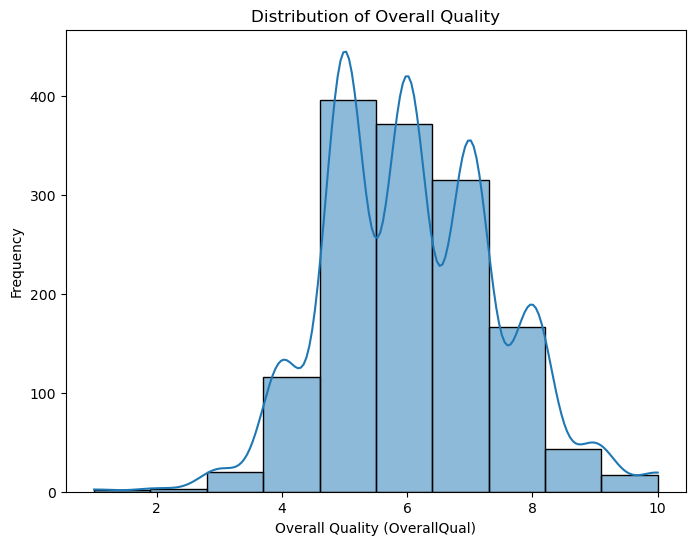

Summary Statistics for Overall Quality:
count    1451.000000
mean        6.093728
std         1.381467
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


In [305]:
# Univariate Analysis: OverallQual
plt.figure(figsize=(8, 6))
sns.histplot(train_selected_df['OverallQual'], bins=10, kde=True)
plt.title('Distribution of Overall Quality')
plt.xlabel('Overall Quality (OverallQual)')
plt.ylabel('Frequency')
plt.show()

# Extract the 'OverallQual' column
quality_values = train_selected_df['OverallQual']

# Summary statistics
print('Summary Statistics for Overall Quality:')
print('='*39)
print(quality_values.describe())

The overall quality of houses tends to be good, with a mean quality rating of approximately 6.09 out of 10.

- **Quality Distribution:** 
  - **Most Common Ratings:** A significant portion of the houses have quality ratings clustered around 5 to 7, indicating that the majority of houses are of average to above-average quality.
  - **High-Quality Houses:** The maximum quality rating is 10, suggesting that some houses are rated as excellent in quality.
  - **Low-Quality Houses:** The minimum quality rating is 1, indicating that there are a few houses with very poor quality.
  
- **Quartile Insights:**
  - **First Quartile (25%):** 25% of houses have a quality rating of 5 or below.
  - **Median (50%):** Half of the houses have a quality rating of 6 or below, indicating that the median house quality is slightly above average.
  - **Third Quartile (75%):** 75% of houses have a quality rating of 7 or below, showing that only a quarter of the houses are rated higher than 7.

Overall, the majority of houses in the dataset are of average to above-average quality, with a few extreme cases of very high or very low quality.

#### ii. Distribution of Ground Living Area (GrLivArea)

Ground Living Area (GrLivArea) refers to the total square footage of a house's living spaces above ground. It includes all the rooms where daily activities take place, excluding basements and other below-ground areas.

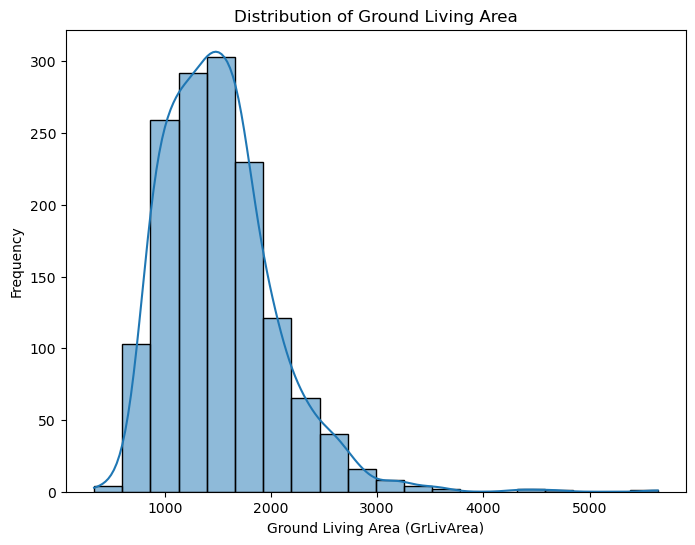

Summary Statistics for Ground Living Area:
count    1451.000000
mean     1514.174363
std       525.799521
min       334.000000
25%      1128.000000
50%      1464.000000
75%      1776.000000
max      5642.000000
Name: GrLivArea, dtype: float64


In [306]:
# Univariate Analysis: GrLivArea
plt.figure(figsize=(8,6))
sns.histplot(train_selected_df['GrLivArea'], bins=20, kde=True)
plt.title('Distribution of Ground Living Area')
plt.xlabel('Ground Living Area (GrLivArea)')
plt.ylabel('Frequency')
plt.show()

# Extract the 'GrLivArea' column
GrLivArea_values = train_selected_df['GrLivArea']

# Summary statistics
print('Summary Statistics for Ground Living Area:')
print('='*42)
print(GrLivArea_values.describe())

- The **average ground living area** is approximately 1514 square feet.
- The **majority of houses** have ground living areas between 1128 (Q1) and 1776 (Q3) square feet.
- There are **some very small houses** (334 square feet) and **some very large houses** (up to 5642 square feet).
- The data shows a **wide range** in the size of ground living areas, with substantial variability around the average size.

#### iii. Distribution of Total Basement Square Footage (TotalBsmtSF)

 “TotalBsmtSF” most refers to the total basement square footage of the houses in the dataset.

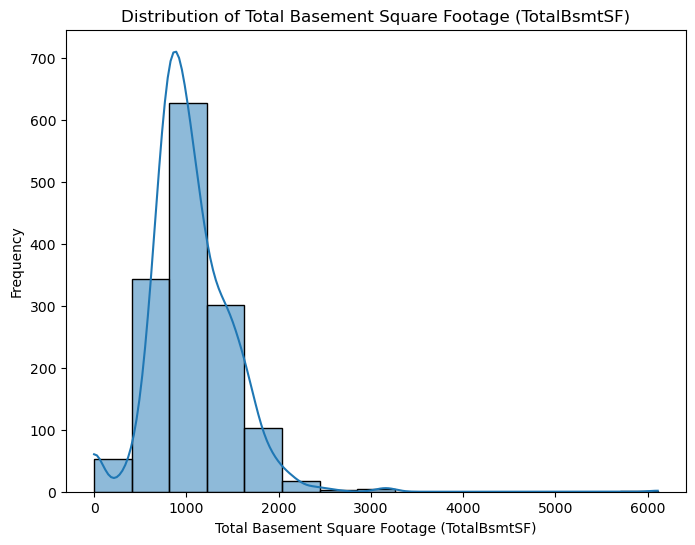

Summary Statistics for Total Basement Square Footage:
count    1451.000000
mean     1056.310131
std       437.914609
min         0.000000
25%       795.000000
50%       991.000000
75%      1297.500000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


In [307]:
# Univariate Analysis: TotalBsmtSF
plt.figure(figsize=(8, 6))
sns.histplot(train_selected_df['TotalBsmtSF'], bins=15, kde=True)
plt.title('Distribution of Total Basement Square Footage (TotalBsmtSF)')
plt.xlabel('Total Basement Square Footage (TotalBsmtSF)')
plt.ylabel('Frequency')
plt.show()

# Extract the 'TotalBsmtSF' column
TotalBsmtSF_values = train_selected_df['TotalBsmtSF']

# Summary statistics
print('Summary Statistics for Total Basement Square Footage:')
print('='*53)
print(TotalBsmtSF_values.describe())

Most of the houses in the dataset have a total basement square footage of less than 2000 square feet. There are also a few houses with a total basement square footage of more than 4000 square feet.

---
- **Total Basement Area:** The average basement size in the dataset is approximately 1056.31 square feet.
- **No Basement:** The minimum value of 0 indicates that some houses do not have a basement.
- **Small Basements:** 25% of houses have a basement size of 795 square feet or smaller.
- **Median Basement Size:** The median basement size is 991 square feet, indicating that half of the houses have a basement size less than or equal to this value.
- **Large Basements:** 25% of houses have a basement size larger than 1297.5 square feet.
- **Very Large Basements:** The maximum basement size recorded is 6110 square feet, which is exceptionally large.

Overall, the majority of houses in the dataset have a basement, with sizes varying widely, but the most common sizes fall between 795 and 1297.5 square feet.

#### iv. Distribution of First Floor Square Footage (1stFlrSF)

 First Floor Square Footage (1stFlrSF) refers to the total living area on the first floor of the houses in the dataset

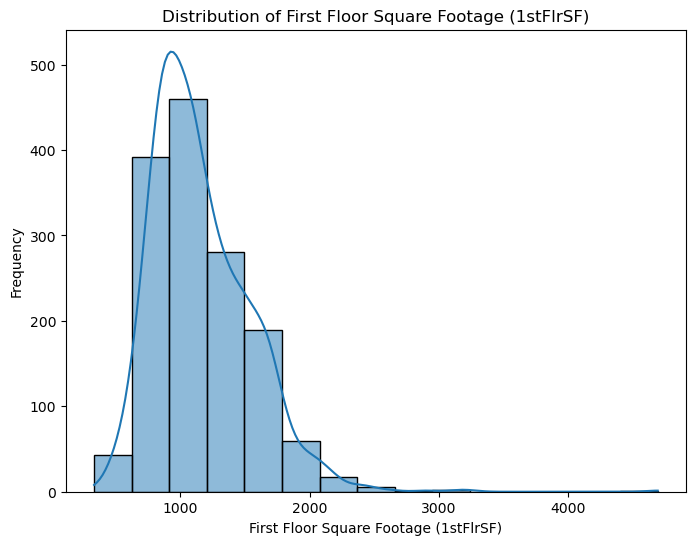

Summary Statistics for First Floor Square Footage (1stFlrSF):
count    1451.000000
mean     1161.551344
std       385.002532
min       334.000000
25%       882.000000
50%      1086.000000
75%      1391.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64


In [308]:
# Univariate Analysis: 1stFlrSF
plt.figure(figsize=(8, 6))
sns.histplot(train_selected_df['1stFlrSF'], bins=15, kde=True)
plt.title('Distribution of First Floor Square Footage (1stFlrSF)')
plt.xlabel('First Floor Square Footage (1stFlrSF)')
plt.ylabel('Frequency')
plt.show()

# Extract the 'TotalBsmtSF' column
FirstFlrSF_values = train_selected_df['1stFlrSF']

# Summary statistics
print('Summary Statistics for First Floor Square Footage (1stFlrSF):')
print('='*60)
print(FirstFlrSF_values.describe())

---
- **First Floor Area:** The average first floor size in the dataset is approximately 1161.55 square feet.
- **Small First Floors:** The minimum value of 334 indicates that some houses have very small first floors.
- **Typical First Floor Sizes:** 25% of houses have a first floor size of 882 square feet or smaller, while 50% have a first floor size of 1086 square feet or smaller.
- **Large First Floors:** 25% of houses have a first floor size larger than 1391 square feet.
- **Very Large First Floors:** The maximum first floor size recorded is 4692 square feet, which is exceptionally large.

Overall, the majority of houses in the dataset have a first floor size that ranges from 882 to 1391 square feet, with a few outliers having very large first floors.

#### v. Distribution of FullBath

A full bathroom is a bathroom that contains four essential fixtures: a sink, a shower, a bathtub, and a toilet. In some cases, a shower and bathtub might be combined into a single unit.

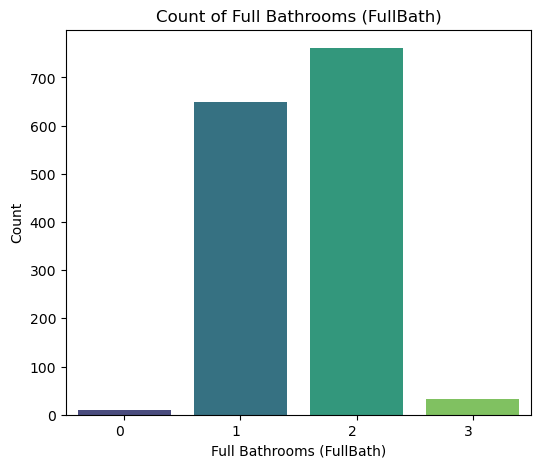

Full Bathrooms (FullBath) Counts:
2    761
1    649
3     32
0      9
Name: FullBath, dtype: int64


In [309]:
# Calculate the count of each category in 'FullBath'
FirstFlrSF_counts = train_selected_df['FullBath'].value_counts()

# Countplot for 'FullBath'
plt.figure(figsize=(6, 5))
sns.countplot(x='FullBath', data=train_selected_df, palette='viridis')
plt.title('Count of Full Bathrooms (FullBath)')
plt.xlabel('Full Bathrooms (FullBath)')
plt.ylabel('Count')
plt.xticks(ha='right')
plt.show()

# Print FullBath counts
print('Full Bathrooms (FullBath) Counts:')
print('='*33)
print(FirstFlrSF_counts)

---
- **Most Common:** The majority of houses (761) have 2 full bathrooms.
- **Single Bathrooms:** A significant number of houses (649) have only 1 full bathroom.
- **Three Bathrooms:** A small number of houses (32) have 3 full bathrooms.
- **No Bathrooms:** Very few houses (9) have no full bathrooms at all.

Overall, houses with 2 full bathrooms are the most common, followed by houses with 1 full bathroom. Houses with 3 or no full bathrooms are few.

#### vi. Distribution of Total Rooms Above Ground (TotRmsAbvGrd)

Total Rooms Above Ground (TotRmsAbvGrd) refers to the total number of rooms in a house that are located on or above the ground floor. This typically excludes basements, garages, and unfinished attics.

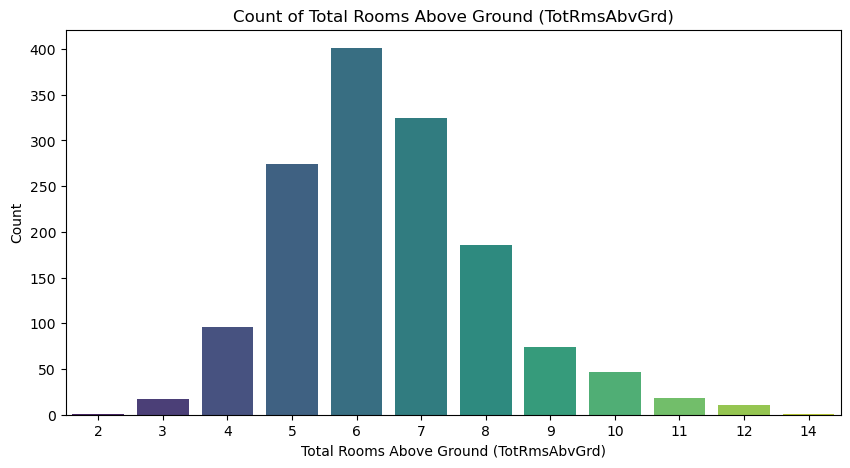

Total Rooms Above Ground (TotRmsAbvGrd) Counts:
6     401
7     325
5     274
8     186
4      96
9      74
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64


In [310]:
# Calculate the count of each category in 'TotRmsAbvGrd'
TotRmsAbvGrd_counts = train_selected_df['TotRmsAbvGrd'].value_counts()

# Countplot for 'TotRmsAbvGrd'
plt.figure(figsize=(10, 5))
sns.countplot(x='TotRmsAbvGrd', data=train_selected_df, palette='viridis')
plt.title('Count of Total Rooms Above Ground (TotRmsAbvGrd)')
plt.xlabel('Total Rooms Above Ground (TotRmsAbvGrd)')
plt.ylabel('Count')
plt.show()

# Print FullBath counts
print('Total Rooms Above Ground (TotRmsAbvGrd) Counts:')
print('='*33)
print(TotRmsAbvGrd_counts)

---
- The most common configuration for houses is 6 rooms above ground, followed closely by 7 rooms.
- There is a range of room configurations, with houses having anywhere from 2 to 14 rooms above ground.
- Houses with extreme room counts like 2 rooms or 14 rooms are rare, with only 1 house each.

#### vii. Distribution of Garage Capacity (GarageCars)

GarageCars refers to the number of car spaces accommodated within the garage of each house in the dataset.

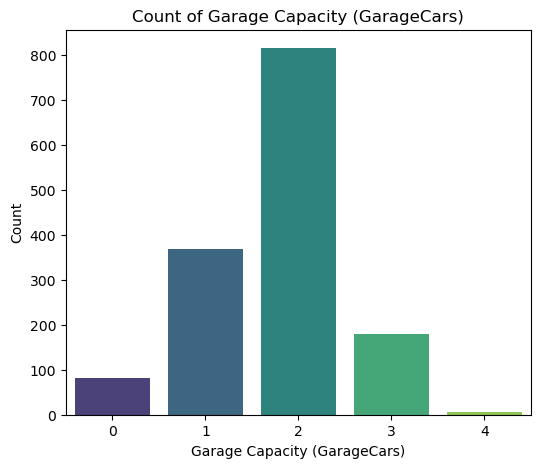

Garage Capacity (GarageCars) Counts:
2    816
1    369
3    180
0     81
4      5
Name: GarageCars, dtype: int64


In [311]:
# Calculate the count of each category in 'GarageCars'
GarageCars_counts = train_selected_df['GarageCars'].value_counts()

# Countplot for 'GarageCars'
plt.figure(figsize=(6, 5))
sns.countplot(x='GarageCars', data=train_selected_df, palette='viridis')
plt.title('Count of Garage Capacity (GarageCars)')
plt.xlabel('Garage Capacity (GarageCars)')
plt.ylabel('Count')
plt.show()

# Print Garage Capacity (GarageCars) counts
print('Garage Capacity (GarageCars) Counts:')
print('='*33)
print(GarageCars_counts)

---
- **Most Common Garage Capacity:** Two-car garages are the most common type, with 816 houses having this capacity. This suggests a significant portion of the houses (around 56%) can accommodate two cars in their garages.

- **Distribution:** The distribution appears skewed towards lower garage capacities. There are more houses with 0, 1, or 2 car garages compared to houses with 3 or 4 car garages. This indicates that a larger proportion of houses have limited garage space.

- **Presence of Larger Garages:** While less common, there are houses with 3 (180 houses) and even 4 car garages (5 houses) in the dataset. This suggests some houses offer ample garage space.

- **No Garage:** 81 houses (6%) lack a garage altogether.

#### viii. Distribution of Year Built (YearBuilt)

Year Built refers to the year in which the construction of the house was completed. 

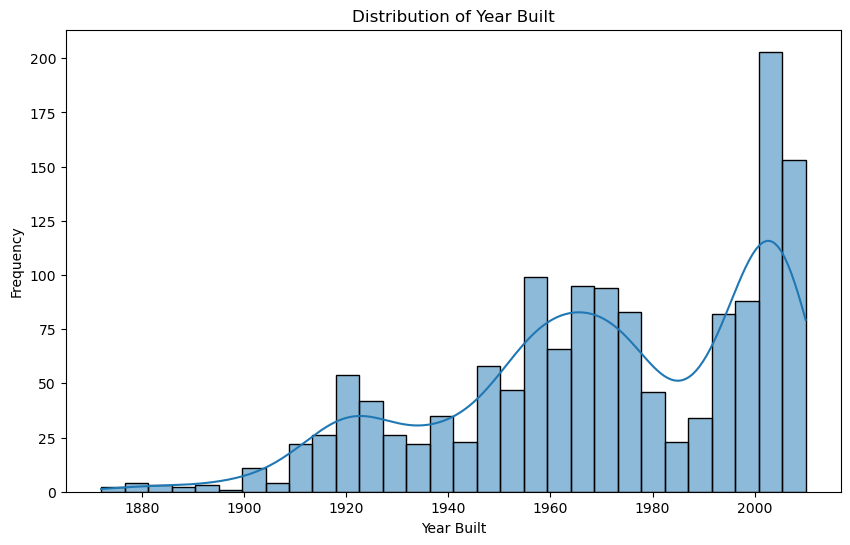

Summary Statistics for Year Built):
count    1451.000000
mean     1971.092350
std        30.190266
min      1872.000000
25%      1954.000000
50%      1972.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


In [312]:
# Univariate Analysis: YearBuilt
plt.figure(figsize=(10, 6))
sns.histplot(train_selected_df['YearBuilt'], bins=30, kde=True)
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

# Extract the 'TotalBsmtSF' column
YearBuilt_values = train_selected_df['YearBuilt']

# Summary statistics
print('Summary Statistics for Year Built):')
print('='*60)
print(YearBuilt_values.describe())

---
- All 1451 houses were built between 1872 and 2010, with the majority built after 1954.
- The distribution of year built in the  dataset is left-skewed since there are more houses built in recent years compared to older years.
- There are fewer houses built before 1954, indicating that older properties are less represented in the dataset.
- Houses built around the year 2000 are around the 75th percentile mark, indicating a significant proportion of houses were constructed in this period.
- The period between 2000 and 2010 saw the highest number of houses being constructed, likely reflecting a period of growth or development in the housing market captured by the dataset.

#### ix. Distribution of Remodeling/Addition Years (YearRemodAdd)

YearRemodAdd refers to the year in which a major remodeling or addition was made to the house.

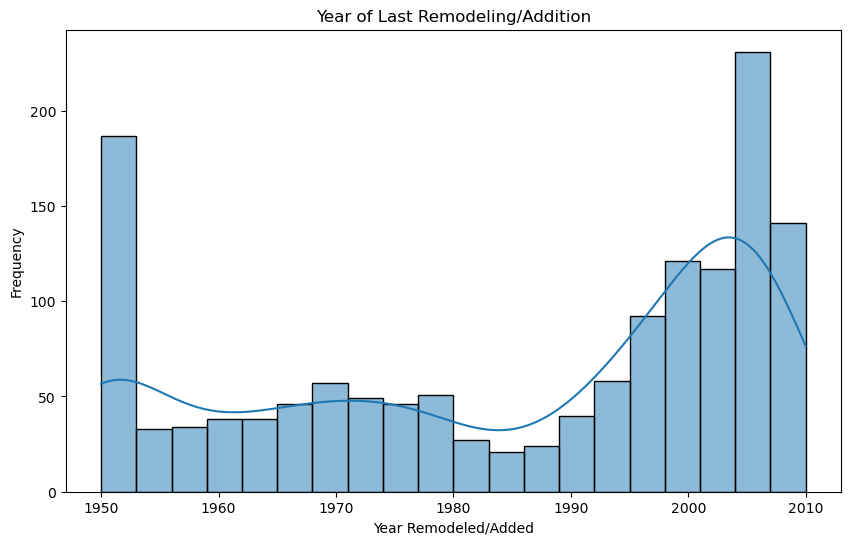

Summary Statistics for Remodeling/Addition Years (YearRemodAdd)):
count    1451.000000
mean     1984.760165
std        20.651334
min      1950.000000
25%      1966.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


In [313]:
# Univariate Analysis: YearRemodAdd
plt.figure(figsize=(10, 6))
sns.histplot(train_selected_df['YearRemodAdd'], bins=20, kde=True)
plt.title('Year of Last Remodeling/Addition') 
plt.xlabel('Year Remodeled/Added')
plt.ylabel('Frequency')
plt.show()


# Extract the 'YearRemodAdd' column
YearRemodAdd_values = train_selected_df['YearRemodAdd']

# Summary statistics
print('Summary Statistics for Remodeling/Addition Years (YearRemodAdd)):')
print('='*65)
print(YearRemodAdd_values.describe())

---
The count plot illustrates fluctuations in remodeling activities over the decades, highlighting periods of higher and lower remodeling rates.
- The dataset shows a range of remodeling and addition years spanning from 1950 to 2010.
- There is a notable concentration of remodels/additions in the 1990s and early 2000s, as indicated by the higher counts during those periods.
- Half of the houses in the dataset (50th percentile or median) had remodeling/addition done in or before 1993.
- Houses remodeled or added after 2004 are relatively fewer, indicating a shift in remodeling patterns or perhaps fewer recent additions captured in the dataset.

#### x. Distribution of SalePrice

"SalePrice" refers to the price at which each house was sold. 

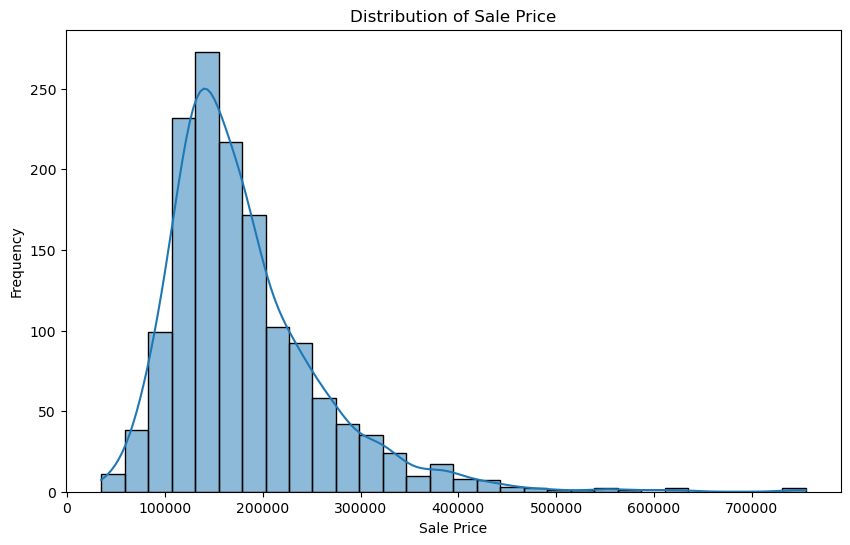

Summary Statistics for Sale Price:
count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [314]:
# Univariate Analysis: SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_selected_df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for SalePrice
print('Summary Statistics for Sale Price:')
print('='*40)
print(train_selected_df['SalePrice'].describe())

- **Histogram Distribution:** The histogram shows a Right-Skewed Distribution. Most houses are concentrated towards the lower end of the price range (left side), with a longer tail extending towards higher prices (right side).

- **Mean Sale Price:** The average sale price of houses in the dataset is approximately USD 180,624

- **Minimum and Maximum Prices:** The lowest recorded sale price is USD 34,900, while the highest is USD 755,000, indicating a wide range of property values.

- **Median Sale Price:** The median sale price (50th percentile) is USD 162,500, providing a central measure of typical sale prices.

- **Price Spread (Interquartile Range):** The interquartile range (IQR) spans from USD 129,900 (25th percentile) to USD 214,000 (75th percentile), capturing where the majority of sale prices lie.

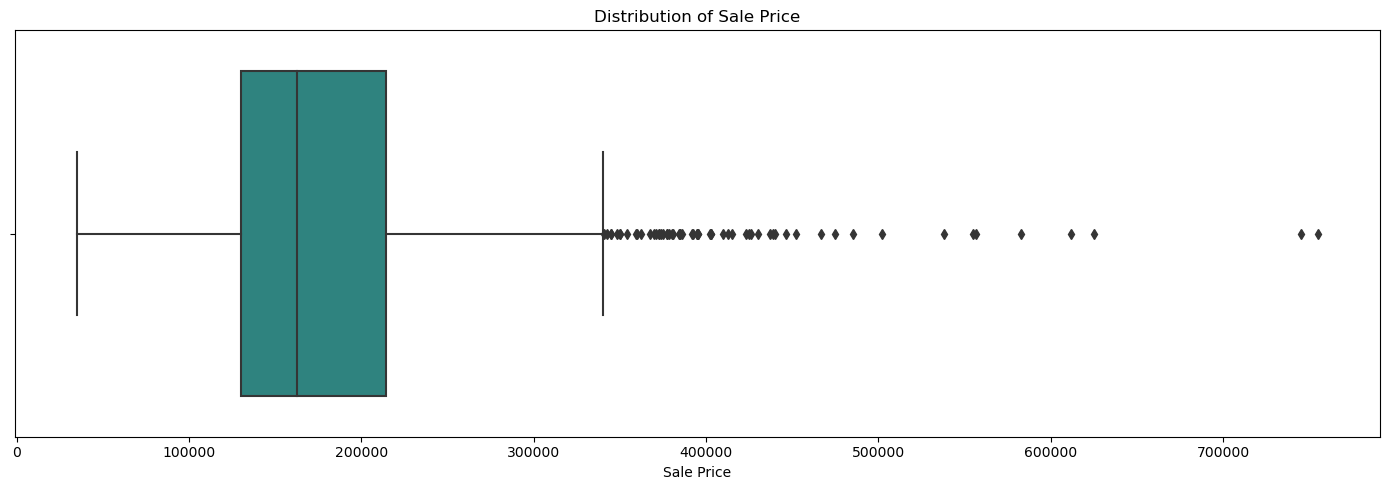

In [315]:
# Box plot for SalePrice
plt.figure(figsize=(14, 5))
sns.boxplot(data=train_selected_df, x='SalePrice', palette='viridis')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.tight_layout()
plt.show()

There are two outliers with prices more than USD 700000.

### b. Bivariate Analysis

The bivariate analysis will focus on investigating the relationship between the different housing-related variables and the sale price.

Analyzing these relationships in relation to the sale price is essential because understanding how the variables interact with the sale price will provide valuable insights into the 

#### i. Trend of Average Sale Price by Year of Construction (Year Built)

In [316]:
# Calculate average SalePrice per YearBuilt
avg_saleprice_year = train_selected_df.groupby('YearBuilt')['SalePrice'].mean().reset_index()

# Plot with Plotly Express
fig = px.line(avg_saleprice_year, x='YearBuilt', y='SalePrice')
fig.update_layout(xaxis_title='Year Built', yaxis_title='Average Sale Price')
fig.update_layout(title='Trend of Average Sale Price by Year of Construction', title_x=0.5)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Print summary statistics without decimal places
print("Summary Statistics for Average Sale Price per Year:")
print("=" * 50)
summary_stats = avg_saleprice_year.describe()
summary_stats = summary_stats.round(0)
summary_stats

Summary Statistics for Average Sale Price per Year:


,YearBuilt,SalePrice
count,112.0,112.0
mean,1952.0,168211.0
std,36.0,55815.0
min,1872.0,82667.0
25%,1924.0,131989.0
50%,1954.0,153620.0
75%,1982.0,201624.0
max,2010.0,394432.0


There are variations in the average sale price over time, with periods of both high and low average sale prices. While there's a general upward trend, there might be some fluctuations in average sale price throughout the years. This hints at potential seasonality and external factors influencing sale prices patterns.

- From the mid 1960s, the average sale price appears to be increasing over time, with newer houses (constructed later) having higher average sale prices than older houses. This suggests a potential appreciation in housing prices over the years.
- The lowest average sale price recorded is USD 82,667 (in the year 1927), while the highest is USD 394,432 (in the year 2010). This wide range underscores the diversity in property values over time.
- The average sale price across all years is approximately USD 168,211, indicating the typical price level for houses in the dataset.
- Prices vary considerably over the years, with the standard deviation of USD 55,815 suggesting significant fluctuations in sale prices.

#### ii. The Relationship Between Overall Quality and The Sale Price

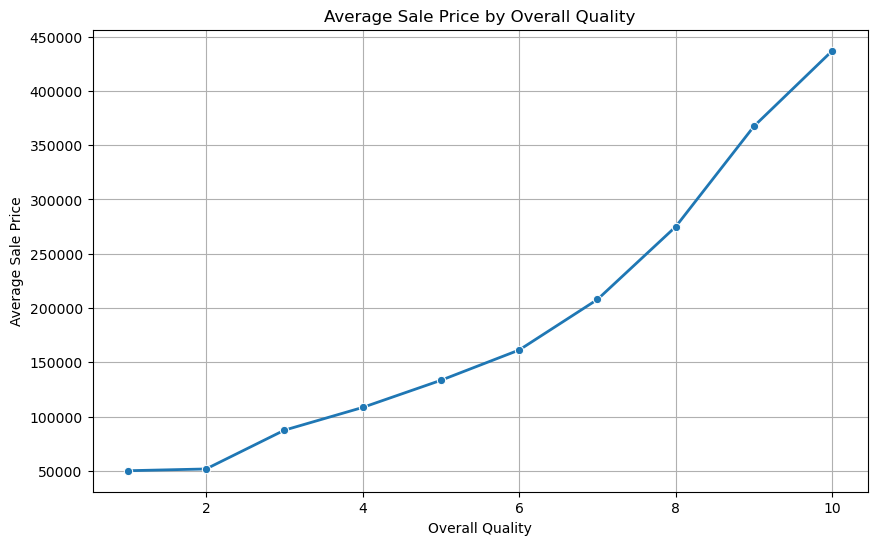

Average Sales Price by  OverallQual Rating


,OverallQual,SalePrice
0,1,50150.000000
1,2,51770.333333
2,3,87473.750000
3,4,108420.655172
4,5,133437.547980
5,6,161350.567204
6,7,207900.917460
7,8,274961.497006
8,9,367513.023256
9,10,437034.764706


In [317]:
# Calculate average sale price for each OverallQual rating
avg_price_per_qual = train_selected_df.groupby('OverallQual')['SalePrice'].mean().reset_index()

# Plotting average sale price over OverallQual using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='OverallQual', y='SalePrice', data=avg_price_per_qual, marker='o', linewidth=2)
plt.title('Average Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.show()

# Display the DataFrame
print("Average Sales Price by  OverallQual Rating")
print('='*43)
avg_price_per_qual

  - As the overall quality (OverallQual) of houses increases from 1 to 10, there is a clear upward trend in the average sale price (SalePrice).
  - Houses with higher overall quality ratings tend to have significantly higher sale prices compared to those with lower ratings.
  - This incremental pattern suggests that buyers are willing to pay more for houses with higher perceived quality.
  - Quality ratings 6 and above (6 to 10) show a steep increase in average sale prices, indicating that houses with these ratings are likely perceived as more desirable and command higher market values.

These insights underline the strong positive correlation between overall quality ratings and sale prices of houses, highlighting the importance of quality assessments in real estate valuation and transactions.

#### iii. The Relationship Between Ground Living Area and Sale Price

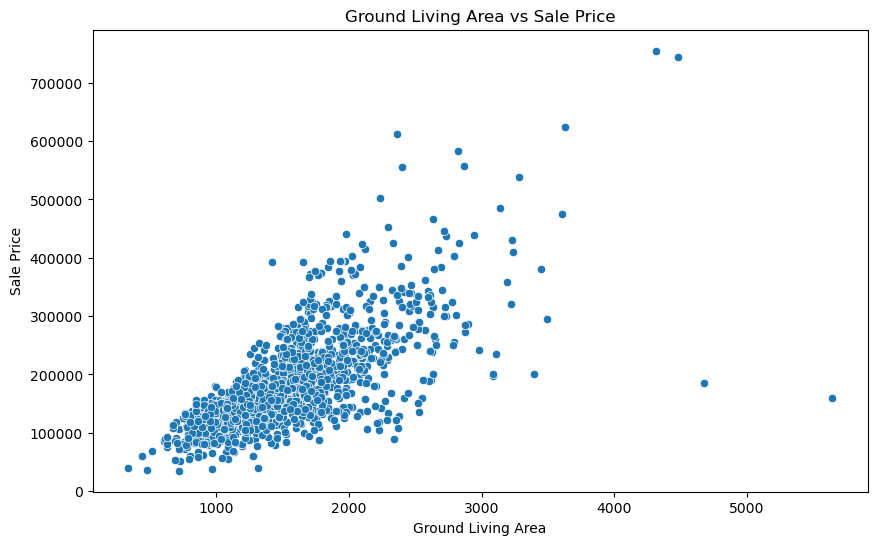

In [318]:
# Using a scatterplot to show the relationship between Ground Living Area and Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_selected_df, palette='viridis')
plt.title('Ground Living Area vs Sale Price')
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.show()

There appears to be a positive correlation between ground living area (square footage) and sale price. This means that houses with larger ground living areas tend to sell for higher prices. This is a common trend in housing markets, as buyers often value more spacious living areas.

#### iv. The Relationship Between Total Basement Square (TotalBsmtSF) Footage and Sale Price

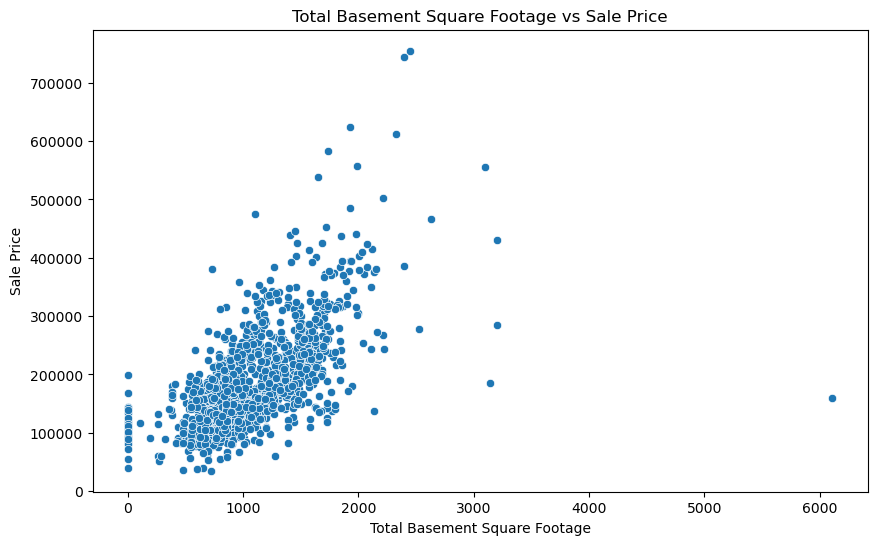

In [319]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_selected_df, palette='viridis')
plt.title('Total Basement Square Footage vs Sale Price')
plt.xlabel('Total Basement Square Footage')
plt.ylabel('Sale Price')
plt.show()

There appears to be a positive correlation between total basement square footage and sale price. This means that houses with larger basements tend to sell for higher prices. This is somewhat intuitive, as basements can provide additional usable living space or storage, potentially increasing a property's value.

#### v. The Relationship Between Garage Capacity (GarageCars) and SalePrice

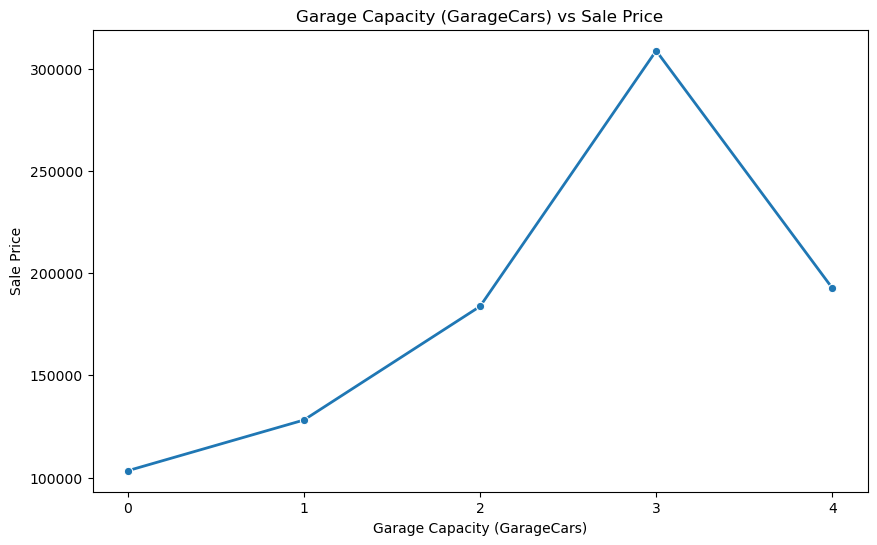

Average Sales Price by Garage Capacity


,GarageCars,SalePrice
0,0,103317.0
1,1,128117.0
2,2,183700.0
3,3,308773.0
4,4,192656.0


In [320]:
# Calculate average sale price for each Garage Capacity
avg_price_per_garage = train_selected_df.groupby('GarageCars')['SalePrice'].mean().reset_index()

# Using bar plot to show the relationship between GarageCars and SalePrice
plt.figure(figsize=(10, 6))
sns.lineplot(x='GarageCars', y='SalePrice', data=avg_price_per_garage, palette='viridis', marker='o', linewidth=2)
plt.title('Garage Capacity (GarageCars) vs Sale Price')
plt.xlabel('Garage Capacity (GarageCars)')
plt.ylabel('Sale Price')
plt.xticks(avg_price_per_garage['GarageCars'])  
plt.show()

# Display the DataFrame
print("Average Sales Price by Garage Capacity")
print('='*38)
avg_price_per_garage.round(0)

The line plot shows a positive correlation between the number of garage spaces (GarageCars) and sale price. This means that houses with more garage capacity tend to sell for higher prices. This is likely because having a garage is a desirable feature for many homebuyers, and the more cars a garage can accommodate, the more valuable it might be perceived.

- **Two-Car Garages**: Homes with 2-car garages have a moderate average sale price.
- **Three-Car Garages**: Properties with 3-car garages command a significantly higher average sale price, indicating a premium for additional parking space.
- **Four-Car Garages**: Despite being less common, homes with 4-car garages also show a high average sale price, slightly less than those with 3-car garages.
- **No Garage**: Homes without garages (`GarageCars = 0`) have notably lower sale prices, highlighting the value that garages add to property valuation.
- **Buyer Preferences**: These findings reflect buyer preferences for homes with adequate garage space, influencing property values based on parking needs and convenience.

#### vi. The Relationship Between First Floor Square Footage and Sale Price

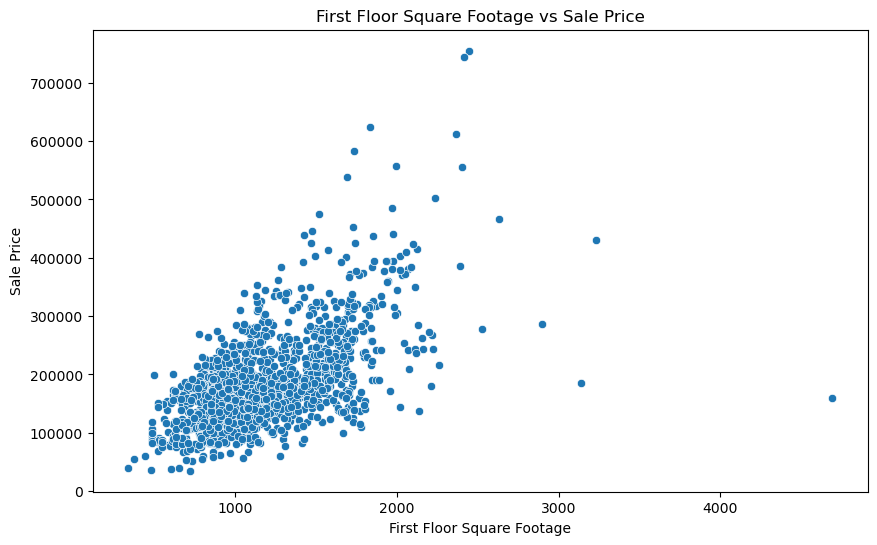

In [321]:
# Using a scatterplot to show the relationship between First Floor Square Footage and Sale Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=train_selected_df)
plt.title('First Floor Square Footage vs Sale Price')
plt.xlabel('First Floor Square Footage')
plt.ylabel('Sale Price')
plt.show()

The scatter plot shows a positive correlation between the two variables. This means that as the first-floor square footage increases, the sale price also tends to increase. This is intuitive as houses with larger first floors typically offer more living space, which can be a desirable feature for buyers and potentially lead to higher sale prices.

#### vii. The Relationship Between Full Bathrooms and Sale Price

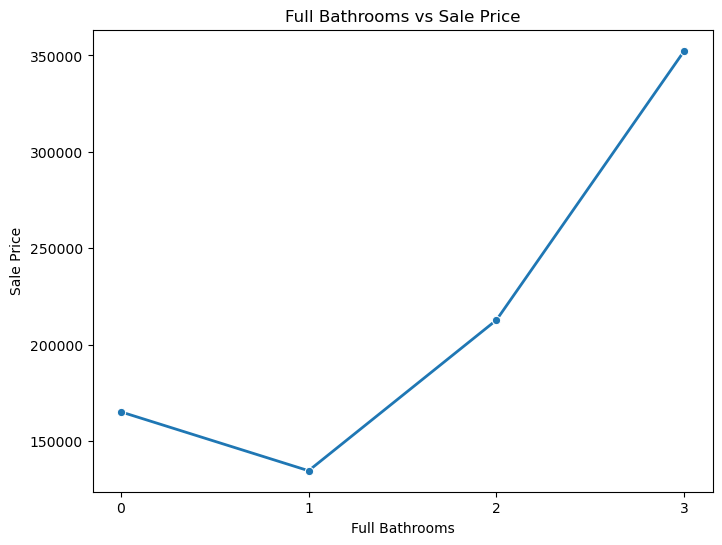

Average Sales Price by Full Bathrooms


,FullBath,SalePrice
0,0,165201.0
1,1,134651.0
2,2,212789.0
3,3,352423.0


In [322]:
# Calculate average sale price for each Full Bathrooms
avg_price_per_bath = train_selected_df.groupby('FullBath')['SalePrice'].mean().reset_index()

# Using line plot to show the relationship between FullBath and SalePrice
plt.figure(figsize=(8, 6))
sns.lineplot(x='FullBath', y='SalePrice', data=avg_price_per_bath, marker='o', linewidth=2)
plt.title('Full Bathrooms vs Sale Price')
plt.xlabel('Full Bathrooms')
plt.ylabel('Sale Price')
plt.xticks(avg_price_per_bath['FullBath'])
plt.show()

# Display the DataFrame
print("Average Sales Price by Full Bathrooms")
print('='*38)
avg_price_per_bath.round(0)

- The line plot reveals a strong positive correlation between the number of full bathrooms (FullBath) in homes and their respective sale prices (SalePrice).
- Average sale prices increase consistently as the number of bathrooms rises from none to three.
- Homes with more bathrooms tend to command higher prices, with significant price jumps observed from one to two bathrooms and from two to three bathrooms.

---
- This trend highlights the value buyers place on additional bathroom amenities, indicating that homes with more bathrooms are perceived as more valuable and desirable in the housing market.
- Conversely, homes without full bathrooms generally have lower average sale prices, suggesting that buyers prefer properties offering more comprehensive bathroom facilities.

#### viii. The Relationship Between Total Rooms Above Ground and Sale Price

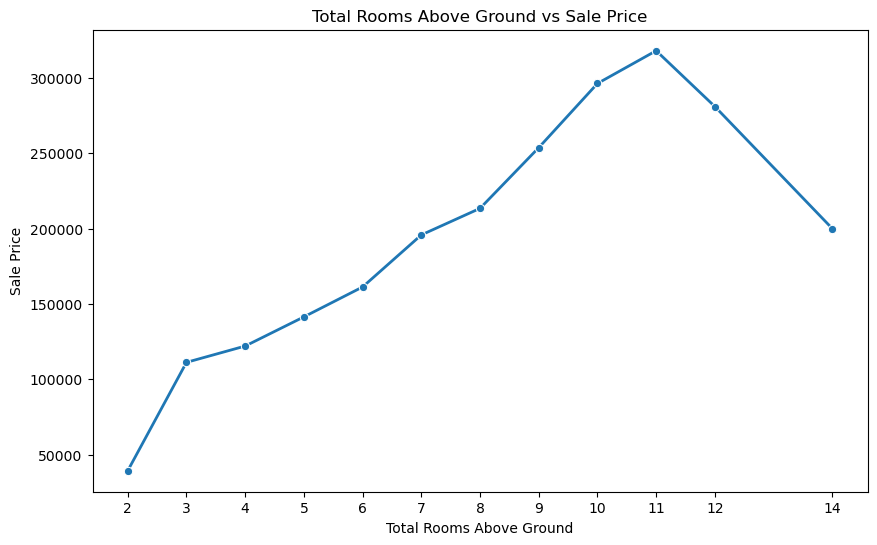

Average Sales Price by Total Rooms Above Ground


,TotRmsAbvGrd,SalePrice
0,2,39300.00
1,3,111217.65
2,4,122041.97
3,5,141392.54
4,6,161251.68
5,7,195778.22
6,8,213411.01
7,9,253695.80
8,10,296279.17
9,11,318022.00


In [323]:
# Calculate average sale price for each Total Rooms Above Ground
avg_price_per_rooms = train_selected_df.groupby('TotRmsAbvGrd')['SalePrice'].mean().reset_index()

# Using line plot to show the relationship between Total Rooms Above Ground and SalePrice
plt.figure(figsize=(10, 6))
sns.lineplot(x='TotRmsAbvGrd', y='SalePrice', data=avg_price_per_rooms, marker='o', linewidth=2)
plt.title('Total Rooms Above Ground vs Sale Price')
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Sale Price')
plt.xticks(avg_price_per_rooms['TotRmsAbvGrd'])
plt.show()

# Display the DataFrame
print("Average Sales Price by Total Rooms Above Ground")
print('='*46)
avg_price_per_rooms.round(2)

---
The line plot shows a strong positive correlation between the number of rooms above ground and the sale price.

- As the number of rooms above ground increases, the average sale price generally rises. This trend suggests that larger homes with more rooms tend to command higher prices in the market.
  
- There is a steady increase in average sale price as the number of rooms increases from 2 to 11. This suggests that each additional room contributes positively to the property's value.

- Homes with 11 rooms above ground have the highest average sale price, indicating that this configuration might be perceived as offering optimal space and functionality, appealing to potential buyers seeking larger living spaces.
  
- The average sale price appears to stabilize or slightly decrease for homes with 12 rooms or more. This could indicate a market preference or diminishing returns in value beyond a certain size or configuration of the home.

These insights highlight how the number of rooms above ground influences property prices, with larger and potentially more versatile homes fetching higher prices in the real estate market.

#### ix. The Relationship Between LandContour and Sale Price

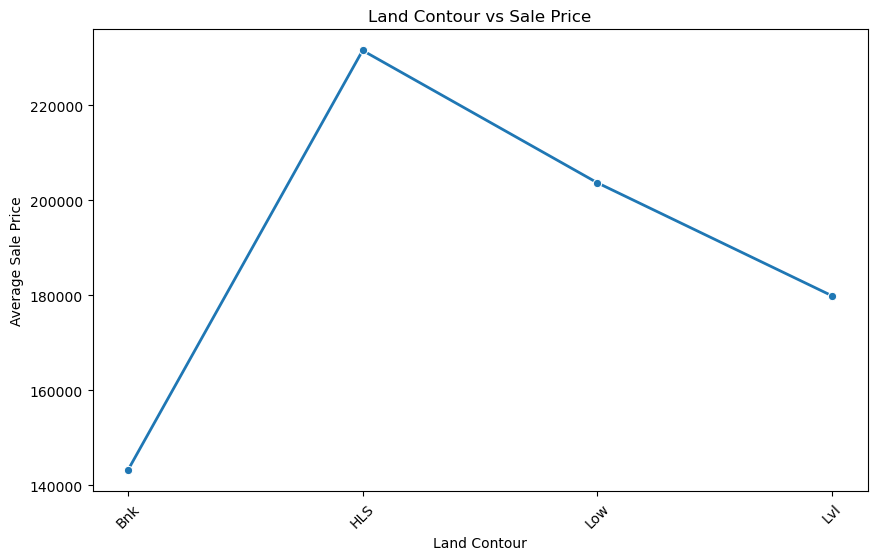

Average Sales Price by Land Contour


,LandContour,SalePrice
0,Bnk,143104.0
1,HLS,231534.0
2,Low,203661.0
3,Lvl,179848.0


In [324]:
# Calculate average sale price for each LandContour
avg_price_per_landcontour = train_selected_df.groupby('LandContour')['SalePrice'].mean().reset_index()

# Plotting the relationship using line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='LandContour', y='SalePrice', data=avg_price_per_landcontour, marker='o', linewidth=2)
plt.title('Land Contour vs Sale Price')
plt.xlabel('Land Contour')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.show()

# Display the DataFrame
print("Average Sales Price by Land Contour")
print('='*38)
avg_price_per_landcontour.round(0)

---
**Bnk (Banked)**:
   - Houses built on banked land (sloped terrain) tend to have a lower average sale price of approximately $143,104. Banked land may require additional landscaping and structural considerations, which could influence pricing downwards.

**HLS (Hillside)**:
   - Properties situated on hillside terrain (HLS), command a higher average sale price of about $231,534. This higher price likely reflects the scenic views and unique architectural opportunities that hillside properties often offer.

**Low**:
   - Houses on low-lying land have an average sale price of around $203,661. Low-lying areas might have issues with drainage and flooding risks, which could impact property values relative to more favorable terrain types.

**Lvl (Level)**:
   - Land described as level (Lvl) shows an average sale price of approximately $179,848. Level land is typically easier to build on and develop, but its value might be moderated compared to hillside properties or those with unique topographies.

These insights suggest that the topography or contour of the land significantly influences property prices. Factors such as views, construction feasibility, and risk of environmental factors like flooding all play roles in determining the sale price of houses based on their land contour.

#### x. The Relationship Between Utilities and Sale Price

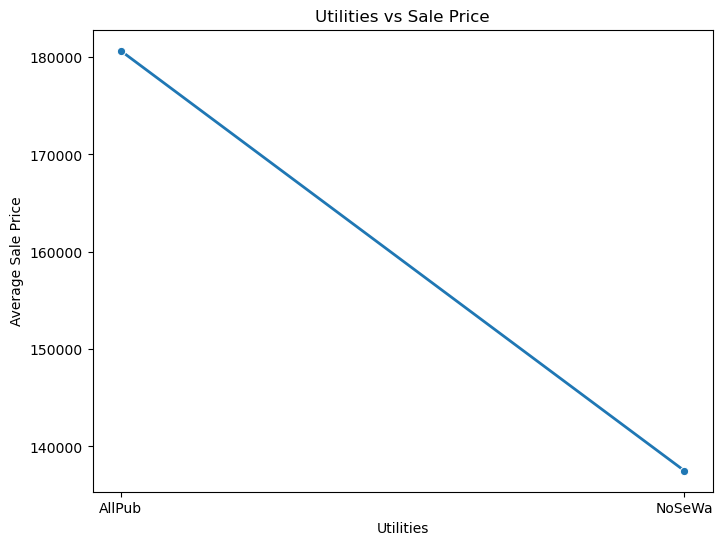

Average Sales Price by Utilities


,Utilities,SalePrice
0,AllPub,180654.0
1,NoSeWa,137500.0


In [325]:
# Calculate average sale price for each Utilities type
avg_price_per_utilities = train_selected_df.groupby('Utilities')['SalePrice'].mean().reset_index()

# Plotting the relationship using line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x='Utilities', y='SalePrice', data=avg_price_per_utilities, marker='o',linewidth=2)
plt.title('Utilities vs Sale Price')
plt.xlabel('Utilities')
plt.ylabel('Average Sale Price')
plt.show()

# Display the DataFrame
print("Average Sales Price by Utilities")
print('='*32)
avg_price_per_utilities.round(0)

---
- Houses with access to all public utilities have an average sale price of USD 180,654. Properties with these amenities typically appeal to a broader range of buyers due to convenience and reliability, potentially contributing to higher property values.


- Properties without access to a public sewer system or with limited water utilities command a lower average sale price of USD 137,500. The absence of essential public utilities can be a deterrent for buyers, impacting property values negatively.

These insights underline the significant impact that access to public utilities can have on property prices. Houses with comprehensive utility access generally fetch higher prices due to enhanced convenience and reliability, whereas properties lacking such amenities may see lower demand and, consequently, lower sale prices.

#### xi. The Relationship Between House Style and Sale Price

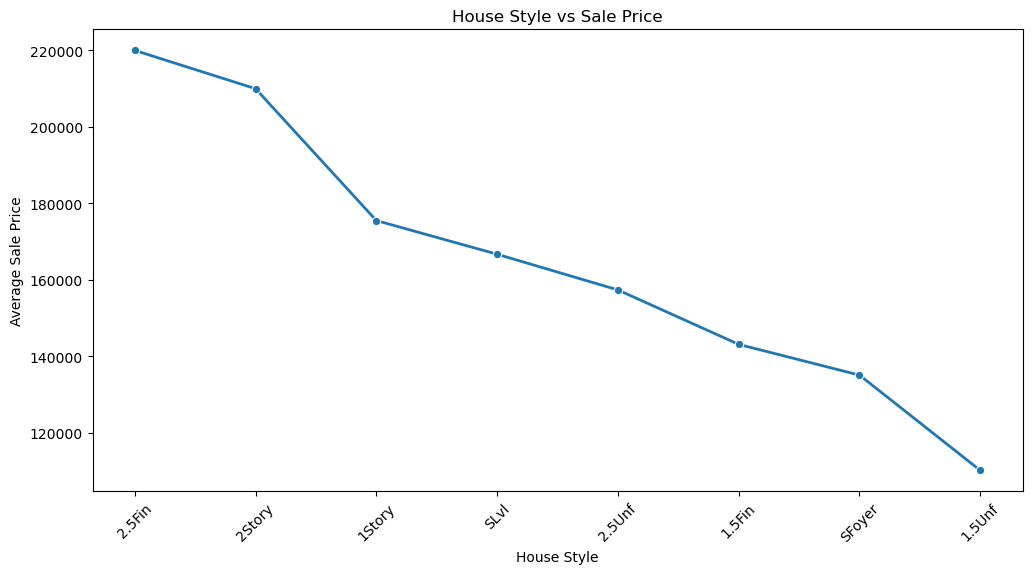

Average Sales Price by House Style


,HouseStyle,SalePrice
0,2.5Fin,220000.0
1,2Story,209985.0
2,1Story,175497.0
3,SLvl,166691.0
4,2.5Unf,157355.0
5,1.5Fin,143117.0
6,SFoyer,135074.0
7,1.5Unf,110150.0


In [326]:
# Calculate average sale price for each HouseStyle
avg_price_per_housestyle = train_selected_df.groupby('HouseStyle')['SalePrice'].mean().reset_index()

# Order by SalePrice in descending order and reset index
avg_price_per_housestyle = avg_price_per_housestyle.sort_values(by='SalePrice', ascending=False).reset_index(drop=True)


# Plotting the relationship using line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='HouseStyle', y='SalePrice', data=avg_price_per_housestyle, marker='o', linewidth=2)
plt.title('House Style vs Sale Price')
plt.xlabel('House Style')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.show()

# Display the DataFrame
print("Average Sales Price by House Style")
print('='*34)
avg_price_per_housestyle.round(0)

---
**2.5Fin (Two and a half story: 2nd level finished)**:
   - Houses of this style have an average sale price of $220,000. This style often offers more living space, including finished attic areas, which contribute to their higher sale price.

**2Story (Two story)**:
   - Two-story houses average a sale price of $209,985. This style is popular for providing distinct separation between living and sleeping areas, appealing to families and those needing more space.

**1Story (One story)**:
   - Single-level houses command an average sale price of $175,497. These homes appeal to buyers seeking convenience and accessibility without the need for stairs.

**SLvl (Split Level)**:
   - Split-level houses average a sale price of $166,691. This style provides multiple levels separated by short flights of stairs, appealing to buyers seeking defined living areas.

**2.5Unf (Two and a half story: 2nd level unfinished)**:
   - Properties with an unfinished second level and an additional half-level average a sale price of $157,355. The lower price reflects the incomplete upper level and potential for additional finishing.

**1.5Fin (One and a half story: 2nd level finished)**:
   - Houses of this style have an average sale price of $143,117. They offer the charm of a sloped-roof second level, which may appeal to buyers looking for unique architectural features.

**SFoyer (Split Foyer)**:
   - Split foyer houses have an average sale price of $135,074. This style typically features a main level entry between two levels, offering unique architectural layout options.

**1.5Unf (One and a half story: 2nd level unfinished)**:
   - Properties with an unfinished second level average a sale price of $110,150. The lower price reflects the incomplete upper level, which may require additional investment to finish.

These insights highlight how different house styles influence sale prices. The highest prices are observed for the 2.5Fin and 2Story styles, which offer more space and finished levels, while the lowest prices are for 1.5Unf and SFoyer styles, reflecting their unfinished or more compact layouts.

Therefore, factors such as architectural features, levels of completion, and layout appeal contribute to the variability in property values across different house styles.

### c. Multivariate Analysis

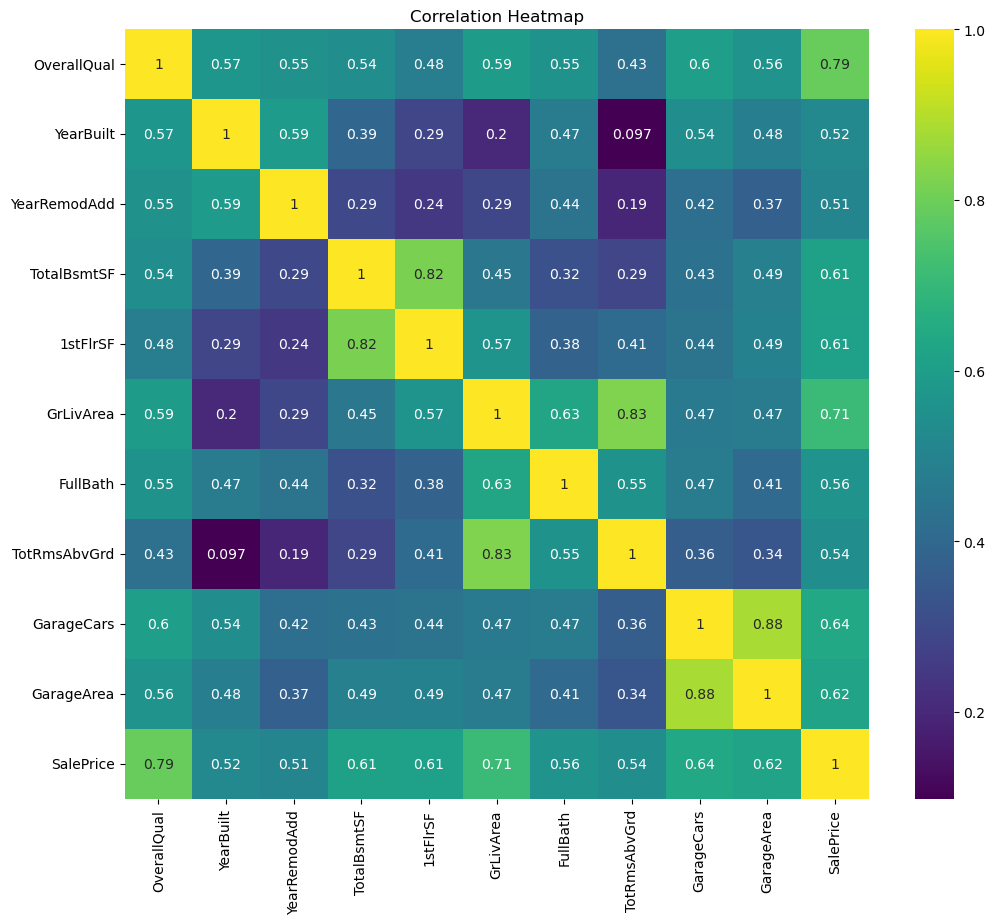

In [327]:
# Plotting a heatmap to visualize correlations between numerical variables in the dataset and the sale price

# Set up the figure size for the heatmap
plt.figure(figsize=(12, 10))

# Create a heatmap of correlations between variables in train_selected_df
sns.heatmap(train_selected_df.corr(), annot=True, cmap='viridis')

# Set the title for the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

- The correlation matrix plot above shows the correlation of each variable with the Sale Price. It summarizes the discussion on the multivariate analysis done earlier. 
- These correlations underscore the importance of size, functionality, and quality in determining house prices. 
- These insights help in understanding which features contribute most significantly to the value of residential properties.

# 3. Data Preparation

Since we prepared all our data previously, identified the features relevant for modeling and we now proceed to encode the categorical columns to prepare the dataset for modeling. 

## 3.1. Encoding Categorical Variables

To encode categorical features effectively, we need to consider the number of unique categories (cardinality) for each feature. Let's check the unique values of each variable to understand the categories in these categorical variables.

In [328]:
# Group columns by data type: categorical and numerical
categorical_cols = train_selected_df.select_dtypes(include=['object']).columns

# Print categorical columns
print("Categorical Columns and Their Unique Values:")
print('=' * 45)
for col in categorical_cols:
    print(f"{col}: {train_selected_df[col].unique()}") 

Categorical Columns and Their Unique Values:
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LandSlope: ['Gtl' 'Mod' 'Sev']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Other'
 'Stone' 'CBlock']
BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']
BsmtFinType2: ['Unf' 'BLQ' 'ALQ' 'Rec' 'LwQ' 'GLQ']
HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
Functional:

In [329]:
# Identifying variables with a large number of different categories
# i.e variables that have high cardinality.
for col in categorical_cols:
    labels=len(train_selected_df[col].value_counts())
    print('{} has {} different categories'.format(col,labels))

LandContour has 4 different categories
Utilities has 2 different categories
LandSlope has 3 different categories
Condition1 has 9 different categories
BldgType has 5 different categories
HouseStyle has 8 different categories
RoofStyle has 6 different categories
RoofMatl has 8 different categories
Exterior1st has 15 different categories
Exterior2nd has 16 different categories
BsmtFinType1 has 6 different categories
BsmtFinType2 has 6 different categories
HeatingQC has 5 different categories
Functional has 7 different categories
GarageType has 6 different categories
GarageQual has 5 different categories
GarageCond has 5 different categories
PavedDrive has 3 different categories


In [330]:
# Select columns with low cardinality (less than 10 unique values)
low_cardinality_cols = [col for col in categorical_cols if train_selected_df[col].nunique() < 10]

# Select columns with high cardinality (10 or more unique values)
high_cardinality_cols = [col for col in categorical_cols if train_selected_df[col].nunique() >= 10]

print("Low Cardinality Columns:")
print('=' * 25)
print(low_cardinality_cols)
print()

print("High Cardinality Columns:")
print('=' * 25)
print(high_cardinality_cols)
print()

Low Cardinality Columns:
['LandContour', 'Utilities', 'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Functional', 'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive']

High Cardinality Columns:
['Exterior1st', 'Exterior2nd']



---

We have high cardinality in some columns, such as Exterior1st and Exterior2nd. Traditional encoding methods like one-hot encoding can lead to a significant increase in dimensionality, potentially impacting model performance negatively.

**One-Hot Encoding** involves creating a new binary column for each unique category in a feature. While effective for features with few categories, it drastically increases dimensionality when applied to high cardinality features like those in our dataset.

Therefore, we will use **target encoding** for categorical variables with high cardinality to efficiently capture the relationship between each categorical feature and the target variable.

**Target Encoding** replaces each category in a feature with the mean of the target variable for that category. This approach maintains model performance by reducing dimensionality compared to one-hot encoding.

**Advantages of Target Encoding:**
- **Reduced Dimensionality:** Manages feature count, especially for high cardinality features.
- **Preserves Information:** Effectively captures the relationship between categorical features and the target variable.
- **Ordinal Features:** Works well with ordinal features that have a natural ordering in their categories.

---

- To properly encode the categorical variables, we will use different encoding techniques depending on the number of unique categories in each variable. 

- For variables with a small number of categories, one-hot encoding is suitable, while for variables with a larger number of categories, we might consider using target encoding or frequency encoding.

- Let's proceed with encoding the categorical columns using one-hot enncoding and target encoding where appropriate.

### 3.1.1 One-Hot Encoding for Low Cardinality Features

We will use one-hot encoding for variables with a small number of categories (typically less than 10 unique values).

In [331]:
# One-hot encode low cardinality columns
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_low_card_cols = one_hot_encoder.fit_transform(train_selected_df[low_cardinality_cols])
encoded_low_card_df = pd.DataFrame(encoded_low_card_cols, columns=one_hot_encoder.get_feature_names_out(low_cardinality_cols))

# Dropping the original low cardinality columns from the dataframe
train_selected_df = train_selected_df.drop(columns=low_cardinality_cols)

# Concatenating the encoded columns to the original dataframe
train_encoded_df = pd.concat([train_selected_df.reset_index(drop=True), encoded_low_card_df], axis=1)

### 3.1.2. Target Encoding for High Cardinality Features

For variables with a high number of unique values, target encoding can be useful. This approach encodes categories based on the mean of the target variable (SalePrice) for each category.

In [332]:
# Target encoding high cardinality columns
target_encoder = ce.TargetEncoder(cols=high_cardinality_cols)
train_encoded_df[high_cardinality_cols] = target_encoder.fit_transform(train_encoded_df[high_cardinality_cols], train_encoded_df['SalePrice'])

In [333]:
# View the encoded dataframe:
train_encoded_df.head()

,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
0,7,2003,2003,213362.758350,214062.570281,856,856,1710,2,8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,6,1976,1976,149422.177337,149803.173013,1262,1262,1262,2,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,7,2001,2002,213362.758350,214062.570281,920,920,1786,2,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,7,1915,1970,149593.927116,164065.985600,756,961,1717,1,7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,8,2000,2000,213362.758350,214062.570281,1145,1145,2198,2,9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


Now that we have our encoded dataset, we can proceed with the modeling steps. 

# 4. Modeling

This approach provides a comprehensive preprocessing pipeline for categorical encoding and prepares the data for modeling. You can adjust the encoding techniques and parameters based on your specific dataset and requirements.

With the dataset now preprocessed, we can proceed with model training as previously outlined.

## 4.1.1. Dataset Splitting

In [334]:
# Separate features and target variable
X = train_encoded_df.drop(columns=['SalePrice'])
y = train_encoded_df['SalePrice']

# Store the initial column order
initial_col_order = X.columns.tolist()

# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Shape of the Training Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of the Evaluation Set (X_eval, y_eval):", X_eval.shape, y_eval.shape)

Shape of the Training Set (X_train, y_train): (1160, 84) (1160,)
Shape of the Evaluation Set (X_eval, y_eval): (291, 84) (291,)


## 4.1.2. Feature Scaling

- Feature scaling is the process of standardizing the range of numerical features/variables of a dataset to a similar scale, typically with a mean of 0 and a standard deviation of 1.
- This is necessary because machine learning algorithms often perform better when features are on a similar scale. Without scaling, features with larger magnitudes may dominate the learning process, leading to biased model results.
- By scaling the features, we ensure that each feature contributes equally to the model's decision-making process, resulting in improved model performance.

In [335]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features in the training set
X_train_scaled = scaler.fit_transform(X_train)

# Scale the numerical features in the test set using the same scaler
X_eval_scaled = scaler.transform(X_eval)

# Convert scaled NumPy arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_eval_scaled_df = pd.DataFrame(X_eval_scaled, columns=X.columns)

In [336]:
# View the first few rows of the scaled X_train
X_train_scaled_df.head()

,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
0,-0.786058,-0.087278,-0.788650,-0.613044,-0.453868,-0.000484,-0.275729,-0.892358,-1.027484,-0.957451,...,-0.188982,-0.097844,-0.050921,0.225221,-0.162938,-0.088427,-0.065795,0.200895,-0.148413,0.303774
1,-0.067518,-0.152892,0.742853,-0.613044,-0.453868,-0.566325,-0.921473,0.200042,-1.027484,0.271137,...,-0.188982,-0.097844,-0.050921,0.225221,-0.162938,-0.088427,-0.065795,0.200895,-0.148413,0.303774
2,-0.067518,-1.727630,-1.650120,-1.077547,-0.558225,0.713554,0.539138,2.068421,0.781137,2.114018,...,-0.188982,-0.097844,-0.050921,0.225221,-0.162938,-0.088427,-0.065795,0.200895,-0.148413,-3.291920
3,0.651022,1.159390,1.077869,-1.083464,-1.075626,-0.959271,-1.369906,-0.519435,0.781137,-0.957451,...,-0.188982,-0.097844,-0.050921,0.225221,-0.162938,-0.088427,-0.065795,0.200895,-0.148413,0.303774
4,-0.067518,1.126583,0.982150,1.119269,1.161630,-0.826792,-1.218720,0.064433,0.781137,-0.343157,...,-0.188982,-0.097844,-0.050921,0.225221,-0.162938,-0.088427,-0.065795,0.200895,-0.148413,0.303774


In [337]:
# View the first few rows of the scaled X_test
X_eval_scaled_df.head()

,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
0,2.088102,1.159390,1.030010,1.119269,1.161630,1.764402,1.738377,0.588032,0.781137,0.885430,...,-0.188982,-0.097844,-0.050921,0.225221,-0.162938,-0.088427,-0.065795,0.200895,-0.148413,0.303774
1,-0.067518,0.240792,-0.310055,-0.613044,-0.453868,-0.853737,-1.249470,-0.263286,0.781137,-0.343157,...,-0.188982,-0.097844,-0.050921,0.225221,-0.162938,-0.088427,-0.065795,0.200895,-0.148413,0.303774
2,-0.786058,-0.152892,-0.884369,-0.613044,-0.453868,-0.218288,-0.524289,-1.075052,-1.027484,-0.343157,...,-0.188982,-0.097844,-0.050921,0.225221,-0.162938,-0.088427,-0.065795,0.200895,-0.148413,0.303774
3,-0.067518,0.240792,0.168540,-0.169827,-0.438170,1.099763,2.340559,1.030642,0.781137,0.271137,...,-0.188982,-0.097844,-0.050921,0.225221,-0.162938,-0.088427,-0.065795,0.200895,-0.148413,0.303774
4,0.651022,1.126583,0.982150,1.119269,1.161630,1.530880,1.471880,0.392153,0.781137,0.271137,...,-0.188982,-0.097844,-0.050921,0.225221,-0.162938,-0.088427,-0.065795,0.200895,-0.148413,0.303774


## 4.2. Model Training

In [338]:
# Initialize models
linear_reg_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()
xgboost_model = XGBRegressor()
lightgbm_model = lgb.LGBMRegressor()

# Train models
linear_reg_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train_scaled, y_train)
random_forest_model.fit(X_train_scaled, y_train)
gradient_boosting_model.fit(X_train_scaled, y_train)
xgboost_model.fit(X_train_scaled, y_train)
lightgbm_model.fit(X_train_scaled, y_train)

# Predictions
linear_reg_preds = linear_reg_model.predict(X_eval_scaled)
lasso_preds = lasso_model.predict(X_eval_scaled)
ridge_preds = ridge_model.predict(X_eval_scaled)
decision_tree_preds = decision_tree_model.predict(X_eval_scaled)
random_forest_preds = random_forest_model.predict(X_eval_scaled)
gradient_boosting_preds = gradient_boosting_model.predict(X_eval_scaled)
xgboost_preds = xgboost_model.predict(X_eval_scaled)
lightgbm_preds = lightgbm_model.predict(X_eval_scaled)

# Evaluation function
def evaluate_model(model_name, preds, true):
    rmse = np.sqrt(mean_squared_error(true, preds))
    print(f"{model_name} RMSE: {rmse}")
    return rmse

# Evaluate models
print("Evaluation Results:")
print('='*18)
linear_reg_rmse = evaluate_model("Linear Regression", linear_reg_preds, y_eval)
lasso_rmse = evaluate_model("Lasso Regression", lasso_preds, y_eval)
ridge_rmse = evaluate_model("Ridge Regression", ridge_preds, y_eval)
decision_tree_rmse = evaluate_model("Decision Tree", decision_tree_preds, y_eval)
random_forest_rmse = evaluate_model("Random Forest", random_forest_preds, y_eval)
gradient_boosting_rmse = evaluate_model("Gradient Boosting", gradient_boosting_preds, y_eval)
xgboost_rmse = evaluate_model("XGBoost", xgboost_preds, y_eval)
lightgbm_rmse = evaluate_model("LightGBM", lightgbm_preds, y_eval)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 1160, number of used features: 54
[LightGBM] [Info] Start training from score 180783.327586
Evaluation Results:
Linear Regression RMSE: 43508.69042369187
Lasso Regression RMSE: 43490.65175786421
Ridge Regression RMSE: 42090.03536364289
Decision Tree RMSE: 35559.73514233873
Random Forest RMSE: 23998.690243846333
Gradient Boosting RMSE: 22483.016590631243
XGBoost RMSE: 24807.26842222193
LightGBM RMSE: 25345.591765232693


In [339]:
# Create DataFrame for RMSE leaderboard
rmse_data = {
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression", "Decision Tree", "Random Forest",
              "Gradient Boosting", "XGBoost", "LightGBM"],
    "RMSE": [linear_reg_rmse, lasso_rmse, ridge_rmse, decision_tree_rmse, random_forest_rmse,
             gradient_boosting_rmse, xgboost_rmse, lightgbm_rmse]
}
rmse_leaderboard_df = pd.DataFrame(rmse_data)

# Sort DataFrame by RMSE in ascending order
rmse_leaderboard_df = rmse_leaderboard_df.sort_values(by='RMSE')

# Reset the index of the DataFrame
rmse_leaderboard_df.reset_index(drop=True, inplace=True)

# Print RMSE leaderboard
print("\nLEADERBOARD (Ranked by RMSE)")
print('='*28)

# Print The RMSE Leaderboard Dataframe
rmse_leaderboard_df


LEADERBOARD (Ranked by RMSE)


,Model,RMSE
0,Gradient Boosting,22483.016591
1,Random Forest,23998.690244
2,XGBoost,24807.268422
3,LightGBM,25345.591765
4,Decision Tree,35559.735142
5,Ridge Regression,42090.035364
6,Lasso Regression,43490.651758
7,Linear Regression,43508.690424


In [340]:
# Select the best model based on RMSE
best_model = rmse_leaderboard_df.iloc[0]['Model']
print(f"\nBest model based on RMSE: {best_model}")


Best model based on RMSE: Gradient Boosting


Based on the RMSE values from the models trained:

The RMSE values indicate the average magnitude of errors between predicted and actual values:
- Lower RMSE values indicate better model performance, as they reflect smaller prediction errors.
- Among the models evaluated, Gradient Boosting has the lowest RMSE of 22514.29, indicating the best performance in terms of predictive accuracy.
- Random Forest follows closely with an RMSE of 23172.67, showing strong performance but slightly higher than Gradient Boosting.
- XGBoost and LightGBM also perform well with RMSE values of 24807.27 and 25345.59, respectively.
- Decision Tree has a higher RMSE of 37057.12, indicating less accurate predictions compared to the boosted models.
- Ridge Regression and Lasso Regression have higher RMSE values of 42090.04 and 43490.65, respectively, suggesting poorer predictive performance compared to tree-based and boosted models.
- Linear Regression shows the highest RMSE of 43508.69 among all models evaluated.

In summary, based on RMSE alone, **Gradient Boosting** demonstrates superior performance in predicting the target variable compared to all other models trained in this evaluation.

# 5. Model Evaluation

## 5.1. Hyperparameter Tuning

In [354]:
# Define the Gradient Boosting model
gb_regressor = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Define RMSE as the scoring metric for GridSearchCV
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_regressor,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,  # Number of cross-validation folds
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model and print best parameters
best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}


In [356]:
# Initialize a new Gradient Boosting Regressor with the best parameters
best_gb_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    subsample=0.8,
    random_state=42
)

# Train the model on the entire training dataset
best_gb_model.fit(X_train_scaled, y_train)

# Predict on the validation set to evaluate performance
y_pred = best_gb_model.predict(X_eval_scaled)

# Calculate RMSE (Root Mean Squared Error) on the validation set
rmse = np.sqrt(mean_squared_error(y_eval, y_pred))
print(f"Validation RMSE: {rmse}")

Validation RMSE: 23809.18905885588


The validation RMSE after tuning (23809.189) is slightly higher than the original RMSE (22483.017). This indicates that the tuned model might not be capturing the underlying patterns in the data effectively. Therefore, we will save the initial trained model.

### 5.1.1. Saving The Best Performing Model and Key Components

In [341]:
# Define the file path where you want to save the components
file_path = 'model_and_key_components.pkl'

# Create a dictionary to store the components
saved_components = {
    'model': gradient_boosting_model,
    'numerical_imputer': numerical_imputer,
    'categorical_imputer': categorical_imputer,
    'one_hot_encoder': one_hot_encoder,
    'target_encoder': target_encoder,
    'scaler': scaler
}

# Save all components in a single pickle file
with open(file_path, 'wb') as file:
    pickle.dump(saved_components, file)

## 5.2. Making Predictions on The Test Dataset

### 5.2.1. Loading The Saved Model and Key Components

In [342]:
# Define the file path to the saved components
file_path = 'model_and_key_components.pkl'

# Load the components from the pickle file
with open(file_path, 'rb') as file:
    loaded_components = pickle.load(file)

# Extract the components
model = loaded_components['model']
one_hot_encoder = loaded_components['one_hot_encoder']
target_encoder = loaded_components['target_encoder']
scaler = loaded_components['scaler']

### 5.2.2. Identifying Low and High Cardinality Columns in the Test Dataset

In [343]:
# Select columns with low cardinality (less than 10 unique values)
low_cardinality_cols_test = [col for col in categorical_cols if test_selected_df[col].nunique() < 10]

# Select columns with high cardinality (10 or more unique values)
high_cardinality_cols_test = [col for col in categorical_cols if test_selected_df[col].nunique() >= 10]

print("Low Cardinality Columns:")
print('=' * 25)
print(low_cardinality_cols)
print()

print("High Cardinality Columns:")
print('=' * 25)
print(high_cardinality_cols)
print()

Low Cardinality Columns:
['LandContour', 'Utilities', 'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Functional', 'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive']

High Cardinality Columns:
['Exterior1st', 'Exterior2nd']



### 5.2.3. Encoding Categorical Features in the Test Dataset

In [344]:
# Apply one-hot encoding for low cardinality columns
encoded_low_card_cols_test = one_hot_encoder.transform(test_selected_df[low_cardinality_cols_test])
encoded_low_card_df_test = pd.DataFrame(encoded_low_card_cols_test, columns=one_hot_encoder.get_feature_names_out(low_cardinality_cols_test))

# Drop original low cardinality columns
test_selected_df = test_selected_df.drop(columns=low_cardinality_cols_test)

# Concatenate encoded columns to original dataframe
test_encoded_df = pd.concat([test_selected_df.reset_index(drop=True), encoded_low_card_df_test], axis=1)

# Apply target encoding for high cardinality columns
test_encoded_df[high_cardinality_cols_test] = target_encoder.transform(test_encoded_df[high_cardinality_cols_test])

### 5.2.4. Scaling Numerical Features in the Test Dataset

In [ ]:
# Scale numerical features in the test set using the scaler fitted on training data
X_test_scaled = scaler.transform(test_encoded_df)

# Convert scaled NumPy array back to DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=test_encoded_df.columns)

### 5.2.5. Making Predictions on the Scaled Test Data

In [351]:
# Make predictions on the transformed test data
predictions = model.predict(X_test_scaled_df)

# Round off the predictions to 0 decimal places
predictions_rounded = predictions.round(0)

# Convert the rounded predictions array to a DataFrame
predictions_df = pd.DataFrame(predictions_rounded, columns=['SalePrice'])

# Concatenate the predictions DataFrame with the original test_selected_df DataFrame
validation_df_with_predictions = pd.concat([test_selected_df, predictions_df], axis=1)

# Display the first few rows of the DataFrame with predictions
validation_df_with_predictions.head()

,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,5.0,1961.0,1961.0,VinylSd,VinylSd,882.0,896.0,896.0,1.0,5.0,1.0,730.0,125720.0
1,6.0,1958.0,1958.0,Wd Sdng,Wd Sdng,1329.0,1329.0,1329.0,1.0,6.0,1.0,312.0,150836.0
2,5.0,1997.0,1998.0,VinylSd,VinylSd,928.0,928.0,1629.0,2.0,6.0,2.0,482.0,168213.0
3,6.0,1998.0,1998.0,VinylSd,VinylSd,926.0,926.0,1604.0,2.0,7.0,2.0,470.0,184985.0
4,8.0,1992.0,1992.0,HdBoard,HdBoard,1280.0,1280.0,1280.0,2.0,5.0,2.0,506.0,212133.0


### 5.2.6. Merging Predictions with Test Dataset IDs

In [352]:
# Merge the 'test_df' and 'test_predictions' based on the common column 'ID'
merged_df = validation_df_with_predictions.merge(test_df[['Id']], left_index=True, right_index=True)

# Now 'merged_df' contains the 'ID' column in addition to the data from 'test_predictions'
results = merged_df[['Id', 'SalePrice']]

# Display the first few rows of the results DataFrame
results.head()

,Id,SalePrice
0,1461,125720.0
1,1462,150836.0
2,1463,168213.0
3,1464,184985.0
4,1465,212133.0


### 5.2.7. Saving the Predictions to a CSV File

In [350]:
# Save the results dataframe to a csv file.
results.to_csv('test_predictions.csv', index=False)